In [229]:
from enum import Enum
from sklearn.cluster import KMeans, DBSCAN, MeanShift, AgglomerativeClustering, OPTICS,  estimate_bandwidth
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn import metrics
import pandas as pd
from scipy.optimize import linear_sum_assignment
import matplotlib.cm as cm
import networkx as nx

import networkx.algorithms.community as nxcom
import community as community_louvain
from networkx.algorithms.community import k_clique_communities, modularity
# Constants
EGO_NODES = [0, 348, 414, 686, 698, 1684, 1912, 3437, 3980]

ONLY_FEATURE_PARAMS = {0 : {'KMeans':{"k": 100}, 'DBSCAN':{"eps": 0.05, "min_samples": 1}, 'MeanShift':{}, 'GMM':{"k": 10, "covariance_type": 'full'}, 'Hier':{"k": 50, "affinity": "euclidean", "linkage": "ward"}, 'OPTICS':{"min_samples": 5, "xi": 0.05, "min_cluster_size": 0.05}},
                       107 : {'KMeans':{"k": 100}, 'DBSCAN':{"eps": 0.07, "min_samples": 1}, 'MeanShift':{}, 'GMM':{"k": 3}, 'Hier':{"k": 50, "affinity": "euclidean", "linkage": "ward"}, 'OPTICS':{"min_samples": 6, "xi": 0.05, "min_cluster_size": 0.05}},
                          348 : {'KMeans':{"k": 100}, 'DBSCAN':{"eps": 0.05, "min_samples": 1}, 'MeanShift':{}, 'GMM':{"k": 3}, 'Hier':{"k": 60, "affinity": "euclidean", "linkage": "ward"}, 'OPTICS':{"min_samples": 5, "xi": 0.05, "min_cluster_size": 0.05}},
                            414 : {'KMeans':{"k": 100}, 'DBSCAN':{"eps": 0.05, "min_samples": 1}, 'MeanShift':{}, 'GMM':{"k": 3}, 'Hier':{"k": 70, "affinity": "euclidean", "linkage": "ward"}, 'OPTICS':{"min_samples": 5, "xi": 0.05, "min_cluster_size": 0.05}},
                                686 : {'KMeans':{"k": 100}, 'DBSCAN':{"eps": 0.05, "min_samples": 1}, 'MeanShift':{}, 'GMM':{"k": 3}, 'Hier':{"k": 65, "affinity": "euclidean", "linkage": "ward"}, 'OPTICS':{"min_samples": 5, "xi": 0.05, "min_cluster_size": 0.05}},
                                    698 : {'KMeans':{"k": 60}, 'DBSCAN':{"eps": 0.05, "min_samples": 1}, 'MeanShift':{}, 'GMM':{"k": 3}, 'Hier':{"k": 65, "affinity": "euclidean", "linkage": "ward"}, 'OPTICS':{"min_samples": 5, "xi": 0.05, "min_cluster_size": 0.05}},
                                    1684 : {'KMeans':{"k": 100}, 'DBSCAN':{"eps": 0.05, "min_samples": 1}, 'MeanShift':{}, 'GMM':{"k": 3}, 'Hier':{"k": 80, "affinity": "euclidean", "linkage": "ward"}, 'OPTICS':{"min_samples": 5, "xi": 0.05, "min_cluster_size": 0.05}},
                                        1912 : {'KMeans':{"k": 100}, 'DBSCAN':{"eps": 0.05, "min_samples": 1}, 'MeanShift':{}, 'GMM':{"k": 3}, 'Hier':{"k": 80, "affinity": "euclidean", "linkage": "ward"}, 'OPTICS':{"min_samples": 5, "xi": 0.05, "min_cluster_size": 0.05}},
                                        3437 : {'KMeans':{"k": 100}, 'DBSCAN':{"eps": 0.05, "min_samples": 1}, 'MeanShift':{}, 'GMM':{"k": 3}, 'Hier':{"k": 80, "affinity": "euclidean", "linkage": "ward"}, 'OPTICS':{"min_samples": 5, "xi": 0.05, "min_cluster_size": 0.05}},
                                            3980 : {'KMeans':{"k": 58}, 'DBSCAN':{"eps": 0.05, "min_samples": 1}, 'MeanShift':{}, 'GMM':{"k": 3}, 'Hier':{"k": 58, "affinity": "euclidean", "linkage": "ward"}, 'OPTICS':{"min_samples": 5, "xi": 0.05, "min_cluster_size": 0.05}}}

# Model types
class Models(Enum):
    KMEANS = 1
    DBSCAN = 2
    MEANSHIFT = 3
    GMM = 4
    HIERS = 5
    Greedy = 6


class ModelTypes(Enum):
    ONLY_FEEATURES = 1
    ONLY_EDGES = 2
    EDGES_AND_FEATURES = 3

# Unsupervised models
class UnsupservisedModels:
    def __init__(self):
        pass

    def get_model(self, model):
        
        if model == Models.KMEANS:
            return My_KMeans()
        elif model == Models.DBSCAN:
            return MY_DBSCAN()
        # elif model == Models.MEANSHIFT:
        #     return MeanShift()
        # elif model == Models.GMM:
        #     return GaussianMixture()
        # elif model == Models.HIERS:
        #     return AgglomerativeClustering()
        else:
            raise ValueError("Model not found")

# KMeans
class My_KMeans:
    def __init__(self, k):
        self.k = k
        print("KMeans initialized")
        
    def train(self, data):
        print("Training KMeans")
        self.model = KMeans(n_clusters=self.k)

        self.data = data
        self.model.fit(data)

        self.centroids = self.model.cluster_centers_
        self.labels = self.model.labels_

    # Get results
    def get_results(self):
        return self.labels
    
# DBSCAN
class My_DBSCAN:
    def __init__(self, eps, min_samples):
        self.eps = 0.5
        self.min_samples = 3
        # Initialize DBSCAN
        self.model = DBSCAN(eps=eps, min_samples=min_samples)

    def train(self, data):
        self.data = data
        self.model.fit(data)

        self.labels = self.model.labels_

    # Get results
    def get_results(self):
        return self.labels
    
# MeanShift
class My_MeanShift:
    def __init__(self) -> None:
        self.model = MeanShift()

    def train(self, data):
        self.data = data
        self.model.fit(data)

        self.labels = self.model.labels_

    # Get results
    def get_results(self):
        return self.labels
    
# GaussianMixture
class My_GMM:
    def __init__(self, k):
        self.k = k
        self.model = GaussianMixture(self.k)

    def train(self, data):
        self.data = data
        self.model.fit(data)

        self.labels = self.model.predict(data)

    # Get results
    def get_results(self):
        return self.labels
    
# AgglomerativeClustering
class My_Hier:
    def __init__(self, k, affinity, linkage):
        self.k = k
        self.affinity = affinity
        self.linkage = linkage

        self.model = AgglomerativeClustering(n_clusters=self.k, affinity=self.affinity, linkage=self.linkage)

    def train(self, data):
        self.data = data
        self.model.fit(data)

        self.labels = self.model.labels_

    # Get results
    def get_results(self):
        return self.labels
    
# OPTICS
class My_OPTICS:
    def __init__(self, min_samples=5, xi=0.05, min_cluster_size=0.05):
        self.model = OPTICS(min_samples=min_samples, xi=xi, min_cluster_size=min_cluster_size)

    def train(self, data):
        self.data = data
        self.model.fit(data)
        self.labels = self.model.labels_

    def get_results(self):
        return self.labels


# Helpers
def get_results(G, data, data_dict, index_dict, labels, model_type, ego, plot=False):
    if model_type == ModelTypes.ONLY_FEEATURES:
        kmeans_labels, dbscan_labels, meanshift_labels, gmm_labels, hier_labels, optics_labels = only_features_models(data, index_dict, ego)
        if plot:
            print('KMeans')
            visualize(G, kmeans_labels, "KMeans")
            print('DBSCAN')
            visualize(G, dbscan_labels, "DBSCAN")
            print('MeanShift')
            visualize(G, meanshift_labels, "MeanShift")
            print('GMM')
            visualize(G, gmm_labels, "GMM")
            print('Hier')
            visualize(G, hier_labels, "Hier")
            print('OPTICS')
            visualize(G, optics_labels, "OPTICS")
    
        
        ars_k_means, nmis_k_means, hs_k_means, cs_k_means, vs_k_means, ber_kmeans = test_labels_results(kmeans_labels, labels)
        ars_dbscan, nmis_dbscan, hs_dbscan, cs_dbscan, vs_dbscan, ber_dbscan = test_labels_results(dbscan_labels, labels)
        ars_meanshift, nmis_meanshift, hs_meanshift, cs_meanshift, vs_meanshift, ber_meanshift = test_labels_results(meanshift_labels, labels)
        ars_gmm, nmis_gmm, hs_gmm, cs_gmm, vs_gmm, ber_gmm = test_labels_results(gmm_labels, labels)
        ars_hier, nmis_hier, hs_hier, cs_hier, vs_hier, ber_hier = test_labels_results(hier_labels, labels)
        ars_optics, nmis_optics, hs_optics, cs_optics, vs_optics, ber_optics = test_labels_results(optics_labels, labels)
        
        # Create dataframe for the results with index as the model name and columns as the metrics
        results =  pd.DataFrame(index=['KMeans', 'DBSCAN', 'MeanShift', 'GMM', 'Hier', 'OPTICS'],
                                 columns=['Adjusted Rand Score', 'Normalized Mutual Info Score', 'Homogeneity Score',
                                            'Completeness Score', 'V Measure Score', 'BER'])
        results.loc['KMeans'] = [ars_k_means, nmis_k_means, hs_k_means, cs_k_means, vs_k_means, ber_kmeans]
        results.loc['DBSCAN'] = [ars_dbscan, nmis_dbscan, hs_dbscan, cs_dbscan, vs_dbscan, ber_dbscan]
        results.loc['MeanShift'] = [ars_meanshift, nmis_meanshift, hs_meanshift, cs_meanshift, vs_meanshift, ber_meanshift]
        results.loc['GMM'] = [ars_gmm, nmis_gmm, hs_gmm, cs_gmm, vs_gmm, ber_gmm]
        results.loc['Hier'] = [ars_hier, nmis_hier, hs_hier, cs_hier, vs_hier, ber_hier]
        results.loc['OPTICS'] = [ars_optics, nmis_optics, hs_optics, cs_optics, vs_optics, ber_optics]
    

        return results
        
        # return pass
    
    elif model_type == ModelTypes.ONLY_EDGES:

        results_greedy, results_newman, results_partition, results_label_propagation, results_asyn_lpa_communities = only_edges_models(G)


        resss= get_data_from_communities(results_greedy)
        ars_greedy, nmis_greedy, hs_greedy, cs_greedy, vs_greedy, ber_greedy = test_labels_results(resss, labels)
        
        best_partition = next(results_newman)
       
        
        ars_newman, nmis_newman, hs_newman, cs_newman, vs_newman, ber_newman = test_labels_results(get_data_from_communities(best_partition), labels)

        ars_partition, nmis_partition, hs_partition, cs_partition, vs_partition, ber_partition = test_labels_results(results_partition, labels)

        ars_propogation, nmis_propogation, hs_propogation, cs_propogation, vs_propogation, ber_propogation = test_labels_results(get_data_from_communities(results_label_propagation), labels)

        ars_lpa, nmis_lpa, hs_lpa, cs_lpa, vs_lpa, ber_lpa = test_labels_results(get_data_from_communities(results_asyn_lpa_communities), labels)
       
        if plot:
            print('Greedy')
            visualize(G, resss, "Greedy")
            print('Newman')
            visualize(G, get_data_from_communities(best_partition), "Newman")
            print('Partition')
            visualize(G, results_partition, "Partition")
            print('Label Propogation')
            visualize(G, get_data_from_communities(results_label_propagation), "Label Propogation")
            print('LPA')
            visualize(G, get_data_from_communities(results_asyn_lpa_communities), "LPA")
        
        # Create dataframe for the results with index as the model name and columns as the metrics
        results =  pd.DataFrame(index=['Greedy', 'Newman', 'Partition', 'Label Propogation', 'LPA'],
                                 columns=['Adjusted Rand Score', 'Normalized Mutual Info Score', 'Homogeneity Score',
                                            'Completeness Score', 'V Measure Score', 'BER'])
        
        results.loc['Greedy'] = [ars_greedy, nmis_greedy, hs_greedy, cs_greedy, vs_greedy, ber_greedy]
        results.loc['Newman'] = [ars_newman, nmis_newman, hs_newman, cs_newman, vs_newman, ber_newman]
        results.loc['Partition'] = [ars_partition, nmis_partition, hs_partition, cs_partition, vs_partition, ber_partition]
        results.loc['Label Propogation'] = [ars_propogation, nmis_propogation, hs_propogation, cs_propogation, vs_propogation, ber_propogation]
        results.loc['LPA'] = [ars_lpa, nmis_lpa, hs_lpa, cs_lpa, vs_lpa, ber_lpa]

        return results


        
        # return resss
        # return only_edges_models(data, labels)
    elif model_type == ModelTypes.EDGES_AND_FEATURES:
        return edges_and_features_models(data, labels)
    else:
        raise ValueError("Model type not found")
    
# Only features models
def only_features_models(data, index_dict, ego):
    """
    data - data
    labels - labels
    
    We are going to use KMeans, DBSCAN, MeanShift, GaussianMixture, AgglomerativeClustering
    """

    # KMeans
    kmeans = KMeans(n_clusters=ONLY_FEATURE_PARAMS[ego]['KMeans']['k'])
    kmeans.fit(data)
    kmeans_labels = get_labels_dir(kmeans.labels_, index_dict)

    # DBSCAN
    dbscan = DBSCAN(eps=ONLY_FEATURE_PARAMS[ego]['DBSCAN']['eps'], min_samples=ONLY_FEATURE_PARAMS[ego]['DBSCAN']['min_samples'])
    dbscan.fit(data)
    dbscan_labels = get_labels_dir(dbscan.labels_, index_dict)

    # MeanShift
    bandwidth = estimate_bandwidth(data)

    meanshift = MeanShift(bandwidth=bandwidth)
    meanshift.fit(data)
    meanshift_labels = get_labels_dir(meanshift.labels_, index_dict)

    # GaussianMixture
    gmm = GaussianMixture(n_components=3, covariance_type='tied', tol=0.001, reg_covar=1e-06, init_params='random', max_iter=200, n_init=3)
    gmm.fit(data)
    gmm_labels = get_labels_dir(gmm.predict(data), index_dict)

    # AgglomerativeClustering
    hier = AgglomerativeClustering(n_clusters=ONLY_FEATURE_PARAMS[ego]['Hier']['k'], affinity=ONLY_FEATURE_PARAMS[ego]['Hier']['affinity'], linkage=ONLY_FEATURE_PARAMS[ego]['Hier']['linkage'])
    hier.fit(data)
    hier_labels = get_labels_dir(hier.labels_, index_dict)

    # OPTICS
    optics = OPTICS(min_samples=ONLY_FEATURE_PARAMS[ego]['OPTICS']['min_samples'], xi=ONLY_FEATURE_PARAMS[ego]['OPTICS']['xi'], min_cluster_size=ONLY_FEATURE_PARAMS[ego]['OPTICS']['min_cluster_size'])
    optics.fit(data)
    optics_labels = get_labels_dir(optics.labels_, index_dict)

    return kmeans_labels, dbscan_labels, meanshift_labels, gmm_labels, hier_labels, optics_labels

# Only edges models
def only_edges_models(G):
    # Greedy modularity communities

    results_greedy = nxcom.greedy_modularity_communities(G)

    # newman modularity communities
    results_newman = nx.community.girvan_newman(G)

    # Louvain modularity communities
    results_partition = community_louvain.best_partition(G)

     # Label propagation communities
    results_label_propagation = list(nxcom.label_propagation_communities(G))

    # Asyn_lpa_communities communities
    results_asyn_lpa_communities = list(nxcom.asyn_lpa_communities(G))


    return results_greedy, results_newman, results_partition, results_label_propagation, results_asyn_lpa_communities

# Edges and features models
def edges_and_features_models(data, labels):
    pass

# Getting dir of the labels from model results
def get_labels_dir(labels, index_dict):
    labels_dir = {}
    for i in range(len(labels)):
        labels_dir[index_dict[i]] = labels[i]
    return labels_dir

# Visualize the results
def visualize(G, labels, model_name):
    # Assign labels as node attributes for visualization
    nx.set_node_attributes(G, labels, 'label')

    # Automatically assign colors based on unique labels
    unique_labels = set(labels.values())
    
    # Create a colormap that has as many colors as there are unique labels
    color_map = plt.get_cmap('viridis', len(unique_labels))
    # Assign a color to each label
    label_to_color = {label: color_map(i) for i, label in enumerate(unique_labels)}
    # Apply the colors to each node based on its label
    node_colors = [label_to_color[G.nodes[node]['label']] for node in G.nodes]

    # Visualize the graph
    plt.figure(figsize=(8, 6))
    nx.draw(G, with_labels=True, node_color=node_colors, node_size=800, font_weight='bold', cmap=color_map)
    
    # Add the model name to the plot title
    plt.title(f'Network Visualization - {model_name}')
    
    plt.show()
    

# Extract the data from the text
def extract_data(text):
    data = []
    for line in text:
        line = line.split()
        data.append([float(line[0]), float(line[1])])
    return np.array(data)
    
# Test labels
def test_labels_results(labels, test_labels):
    list_labels = []
    list_test_labels = []
    for i in test_labels.keys():
        list_labels.append(labels[i])
        list_test_labels.append(test_labels[i])
    
    labels = np.array(list_labels)
    test_labels = np.array(list_test_labels)
    ars = metrics.adjusted_rand_score(test_labels, labels)
    nmis = metrics.normalized_mutual_info_score(test_labels, labels)
    hs = metrics.homogeneity_score(test_labels, labels)
    cs = metrics.completeness_score(test_labels, labels)
    vs = metrics.v_measure_score(test_labels, labels)
    ber = optimal_BER_matching(labels, test_labels)
    # print("Adjusted Rand Score: ", ars)
    # print("Normalized Mutual Info Score: ", nmis)
    # print("Homogeneity Score: ", hs)
    # print("Completeness Score: ", cs)
    # print("V Measure Score: ", vs)

    return ars, nmis, hs, cs, vs, ber

# Get the data from greedy modularity communities
def get_data_from_communities(results_greedy):
    labels = {}
    for i in range(len(results_greedy)):
        for j in results_greedy[i]:
            labels[j] = i
    return labels

    
# Read labels
def read_labels(filename):
    labels = {}
    with open(filename, 'r') as file:
        for i, line in enumerate(file):
            words = line.split()
            for word in words[1:]:  # Skip the circle name
                labels[word] = i  # Assign the label
    
    return labels

# Get nessasary labels
def get_nessasary_labels(test_labels, labels):
    sorted_keys = sorted(labels.keys())

    final_test_labels = [test_labels[i - 1] for i in  sorted_keys]
    final_labels = [labels[i] for i in sorted_keys]
    return final_test_labels, final_labels

# Create data 
def create_data(filename):
    data = np.loadtxt(filename, delimiter=" ")
    final_data = []
    final_data_dict = {}
    index_dict = []

    for i in range(len(data)):
        final_data.append(data[i][1:])
        final_data_dict[str(int(data[i][0]))] = data[i][1:]
        index_dict.append(str(int(data[i][0])))
    return final_data, final_data_dict, index_dict

# Calculate BER
def optimal_BER_matching(labels, test_labels):
    """
    Find the optimal matching between predicted and ground-truth circles to minimize BER.

    Parameters:
    - predicted_circles: list of sets, predicted circles.
    - ground_truth_circles: list of sets, ground-truth circles.
    - U: set, universal set of all nodes in the network.

    Returns:
    - Total optimal BER score after matching.
    """
    cost_matrix = []
    predicted_circles = dict_to_circles(labels)
    ground_truth_circles = dict_to_circles(test_labels)
    U = set(range(len(labels)))

    for C in predicted_circles:
        row = [calculate_BER(C, C_bar, U) for C_bar in ground_truth_circles]
        cost_matrix.append(row)
        
    row_ind, col_ind = linear_sum_assignment(cost_matrix)
    optimal_BER = sum(1 - cost_matrix[row][col] for row, col in zip(row_ind, col_ind)) / len(predicted_circles)
    return optimal_BER


# Calculate BER
def calculate_BER(C, C_bar, U):
    """
    Calculate the Balanced Error Rate (BER) between two circles.

    Parameters:
    - C: set, predicted circle.
    - C_bar: set, ground-truth circle.
    - U: set, universal set of all nodes in the network.

    Returns:
    - BER score.
    """
    C_complement = U - C
    C_bar_complement = U - C_bar

    false_positives = len(C - C_bar) / len(C) if C else 0
    false_negatives = len(C_bar_complement - C_complement) / len(C_bar_complement) if C_bar_complement else 0

    BER = 0.5 * (false_positives + false_negatives)

    return BER

def dict_to_circles(label_dict):
    """
    Convert a dictionary mapping nodes to labels into a list of sets, where each set
    contains the nodes belonging to a specific label (circle).

    Parameters:
    - label_dict: Dictionary where keys are node identifiers and values are their labels.

    Returns:
    - List of sets, with each set representing a circle.
    """
    circles = {}
    for i in range(len(label_dict)):
        label = label_dict[i]
        if label not in circles:
            circles[label] = set()
        circles[label].add(i)
    return list(circles.values())

## Our approach is to analyze the ego networks and use unsupervised learning methods to predict circles

Ego node: 0


/Users/mkrtichhovsepyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_optics.py:807: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


KMeans


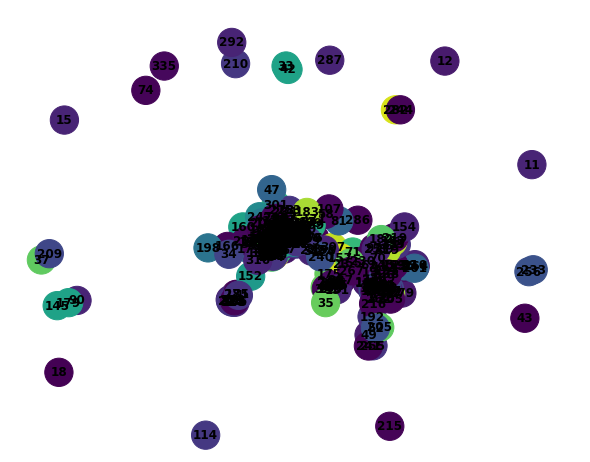

DBSCAN


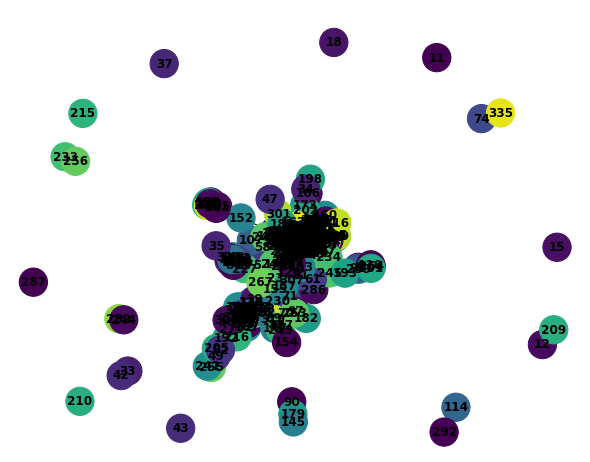

MeanShift


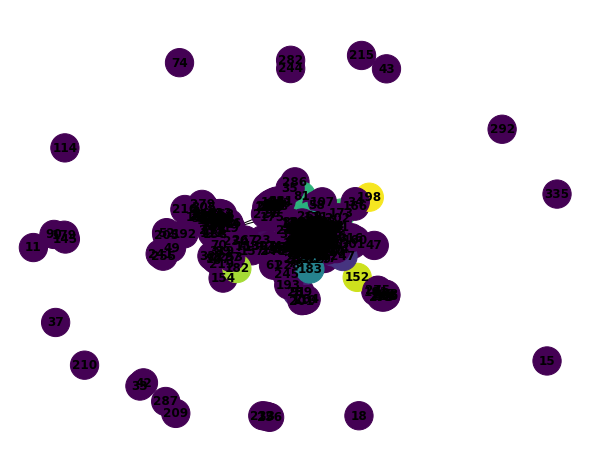

GMM


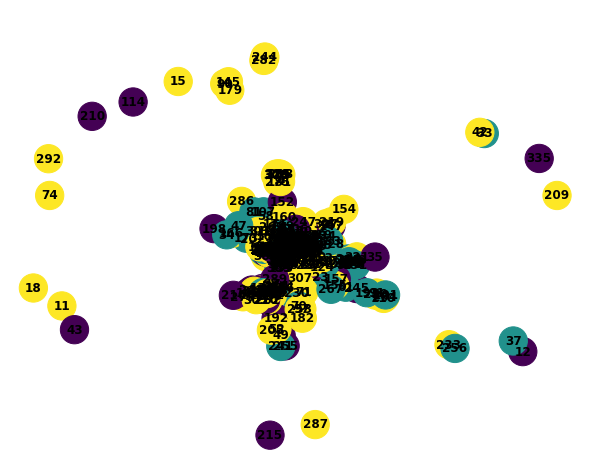

Hier


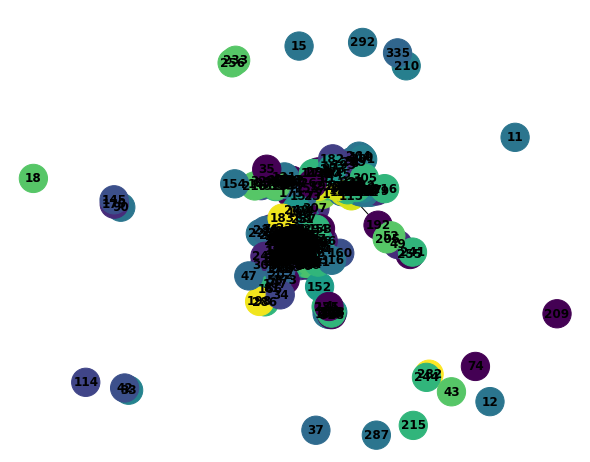

OPTICS


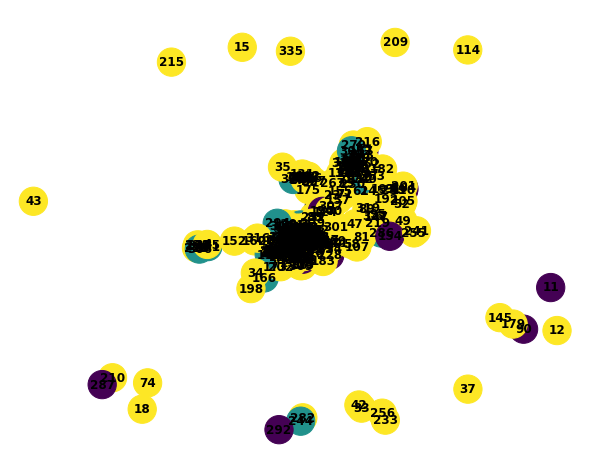

Greedy


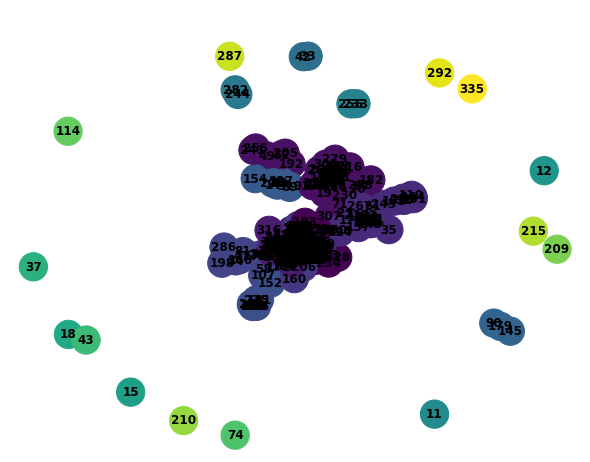

Newman


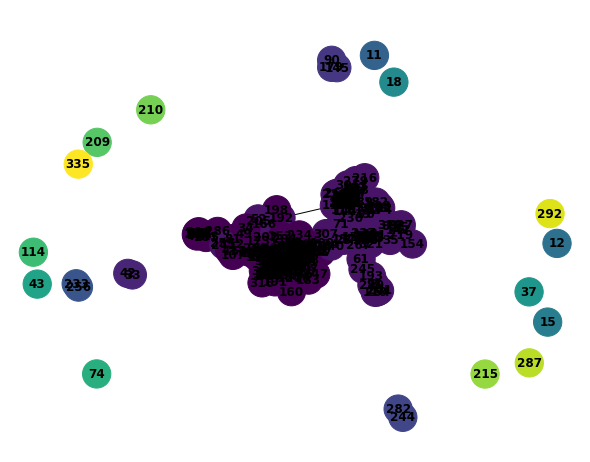

Partition


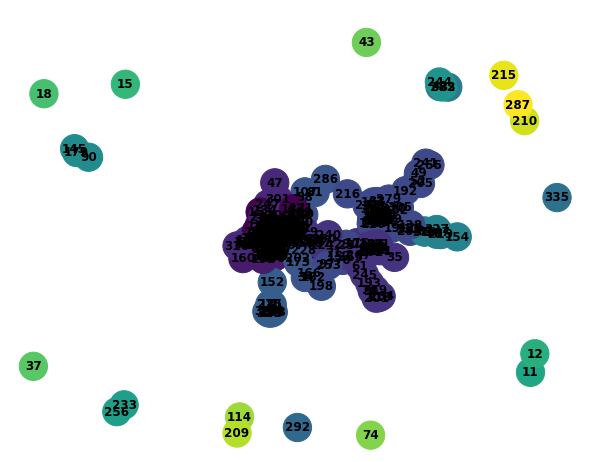

Label Propogation


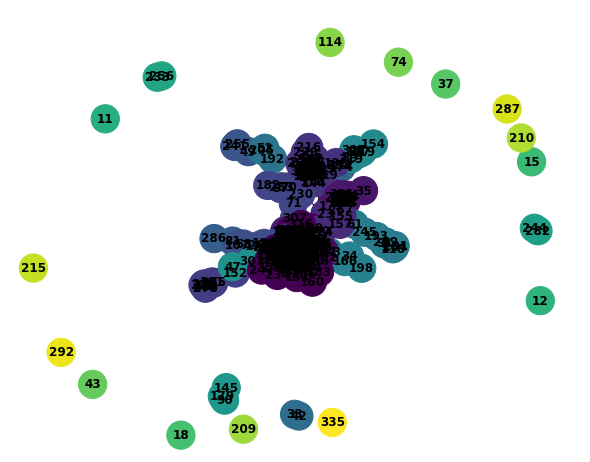

LPA


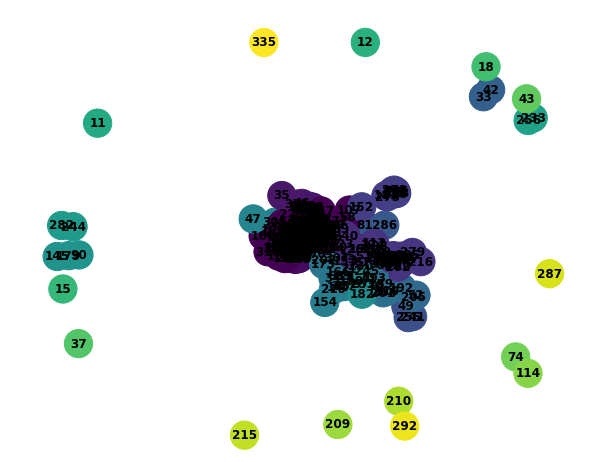

Ego node: 348


/Users/mkrtichhovsepyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_optics.py:807: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


KMeans


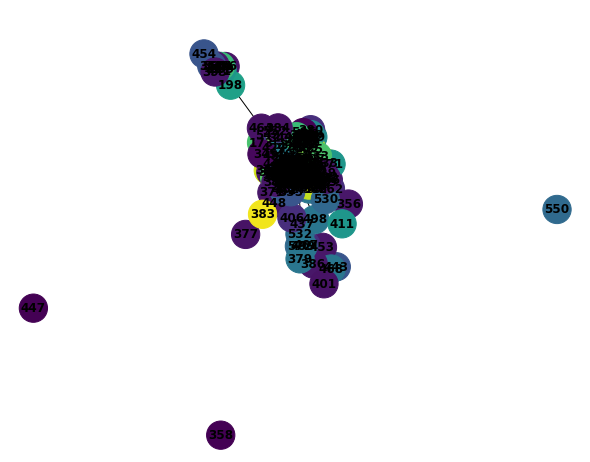

DBSCAN


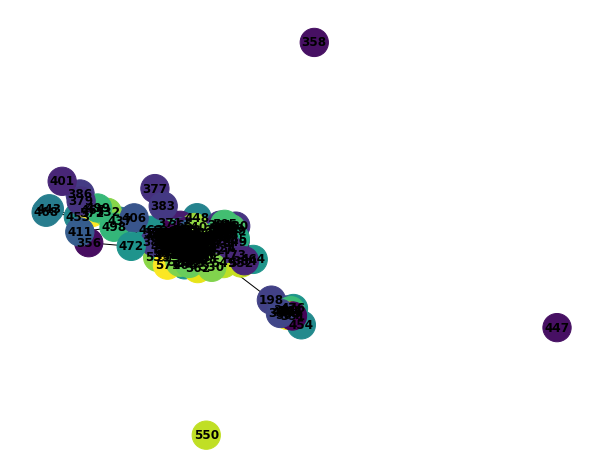

MeanShift


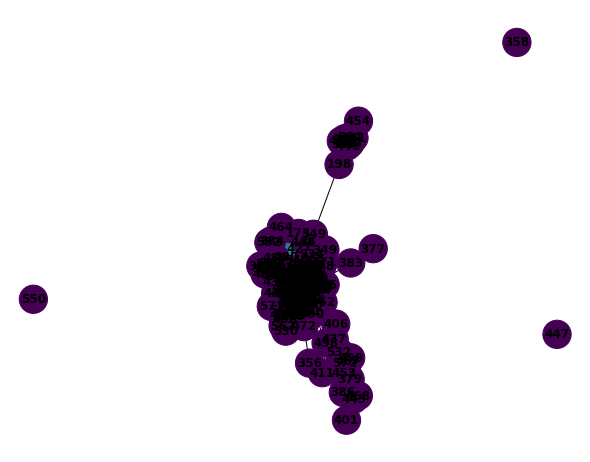

GMM


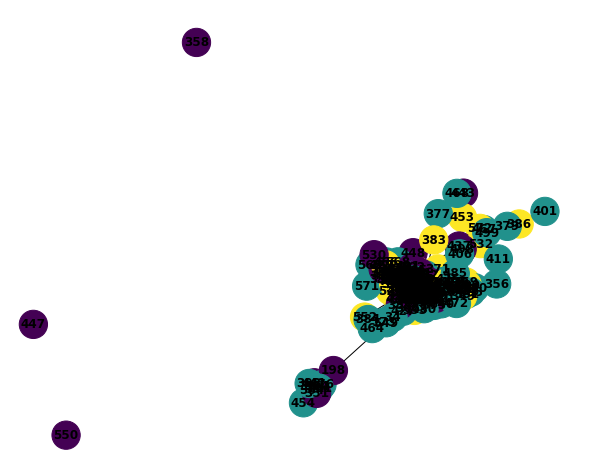

Hier


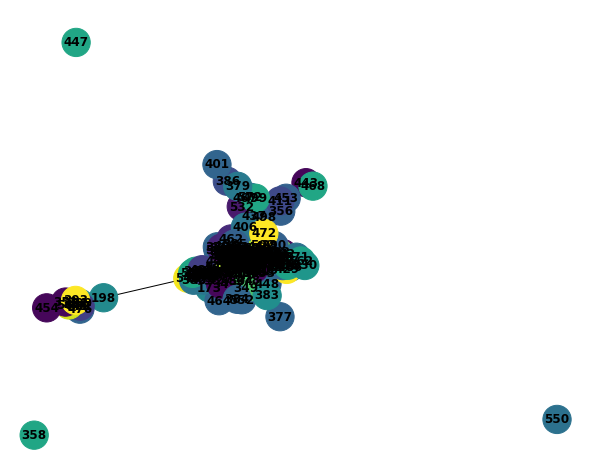

OPTICS


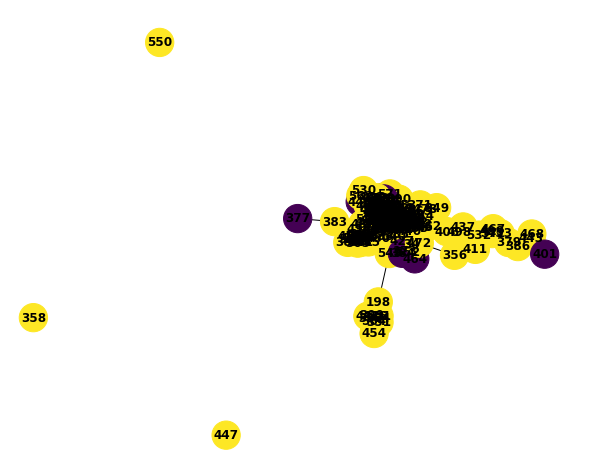

Greedy


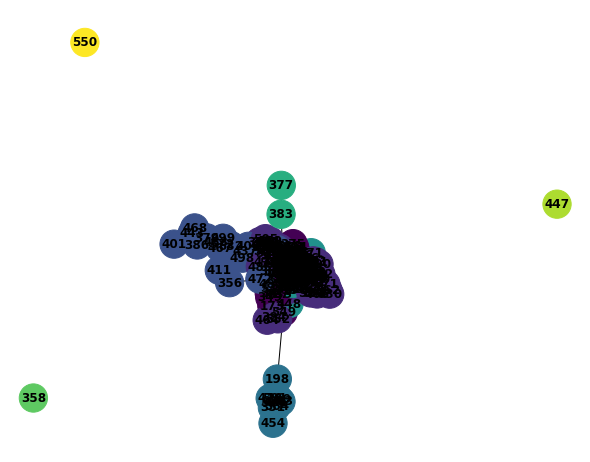

Newman


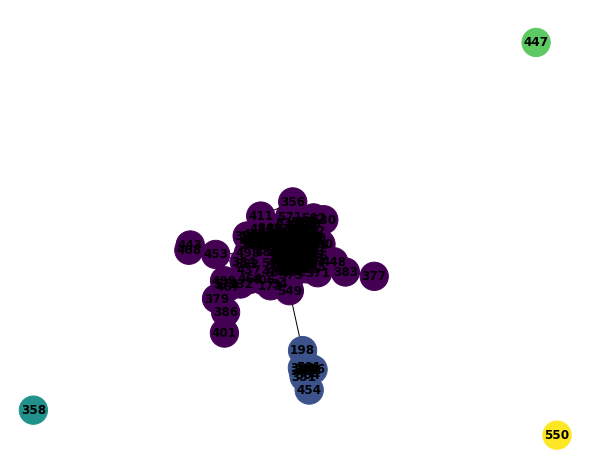

Partition


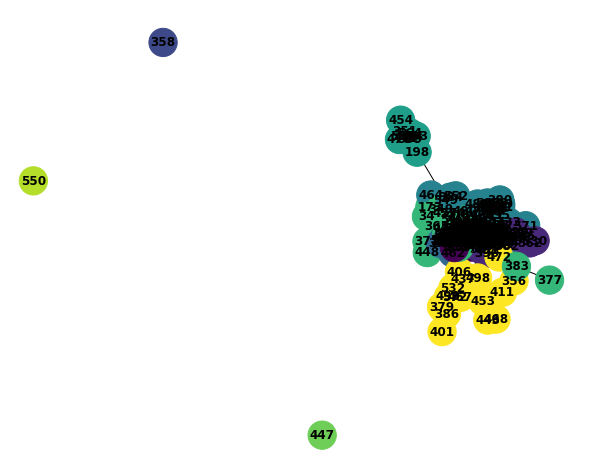

Label Propogation


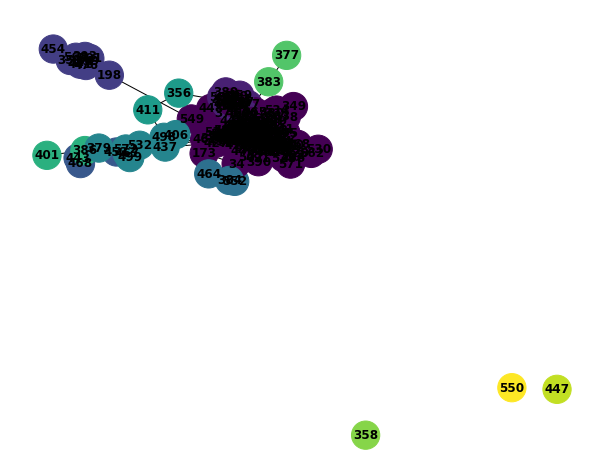

LPA


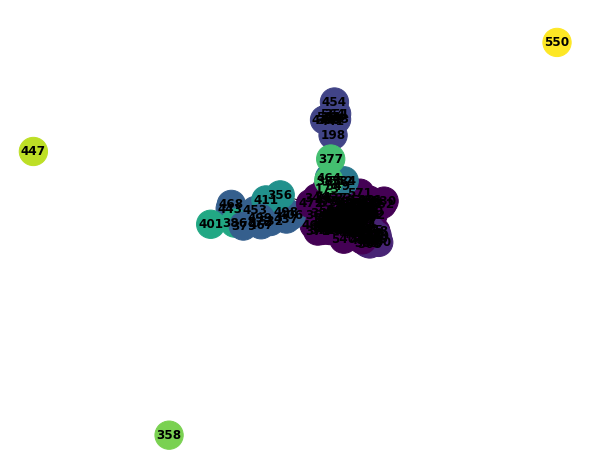

Ego node: 414


/Users/mkrtichhovsepyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_optics.py:807: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


KMeans


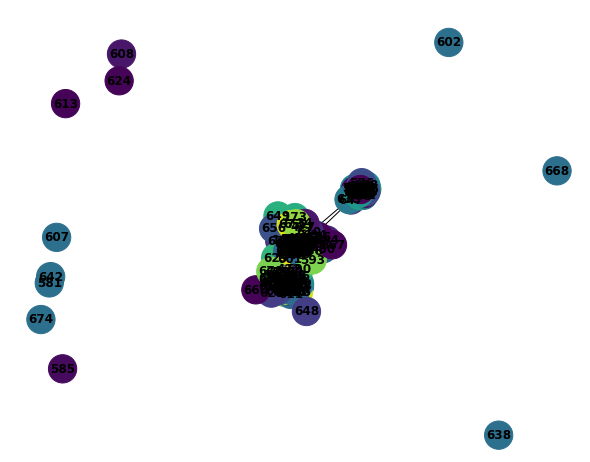

DBSCAN


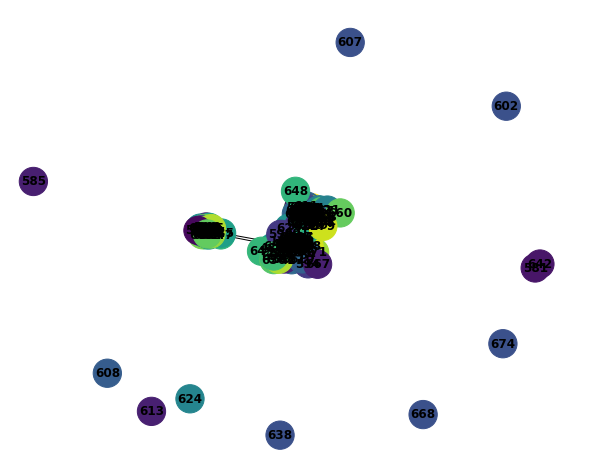

MeanShift


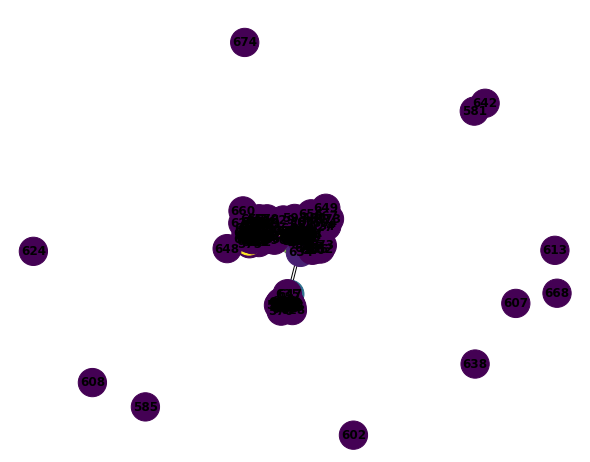

GMM


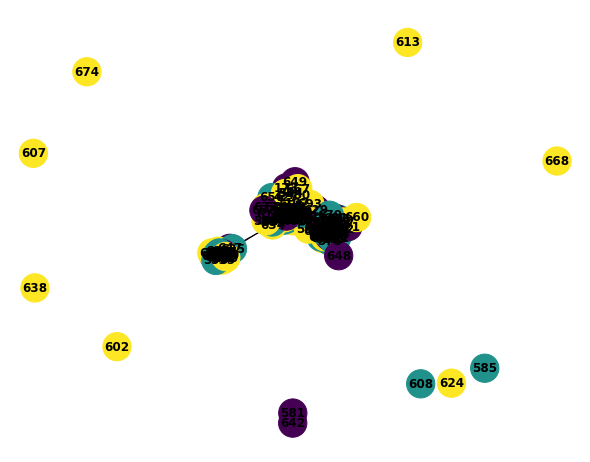

Hier


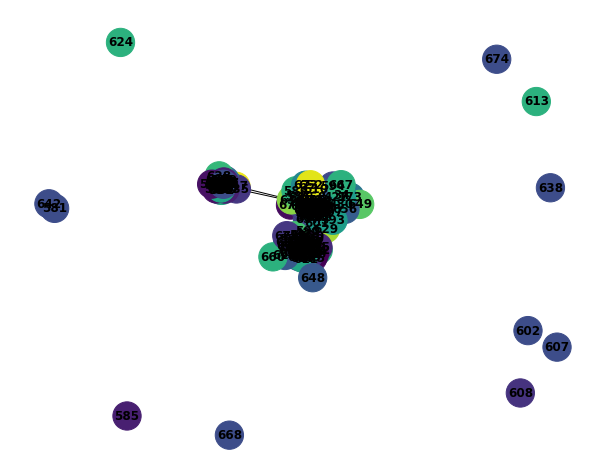

OPTICS


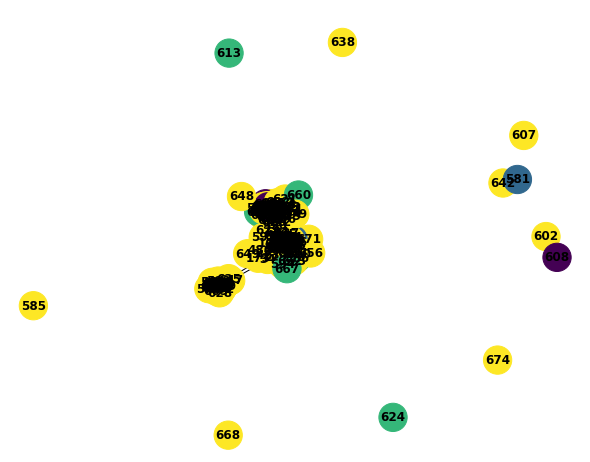

Greedy


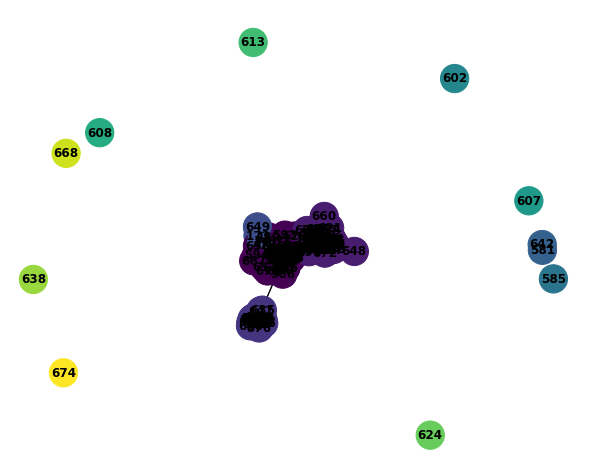

Newman


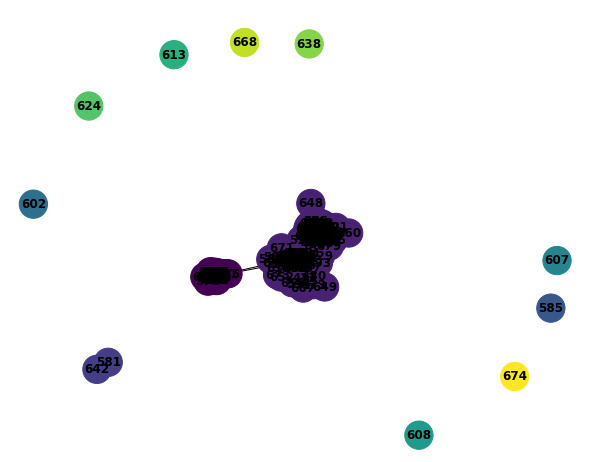

Partition


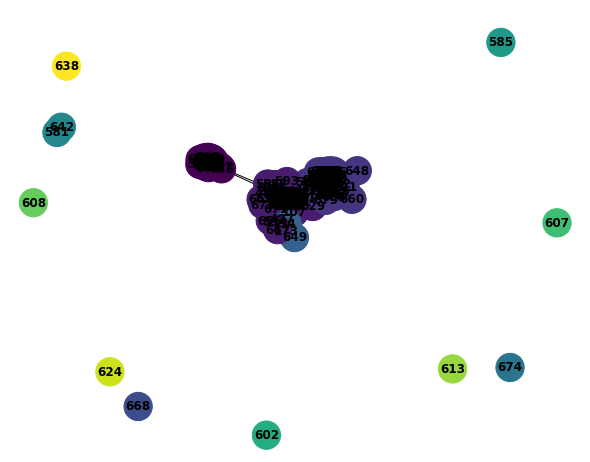

Label Propogation


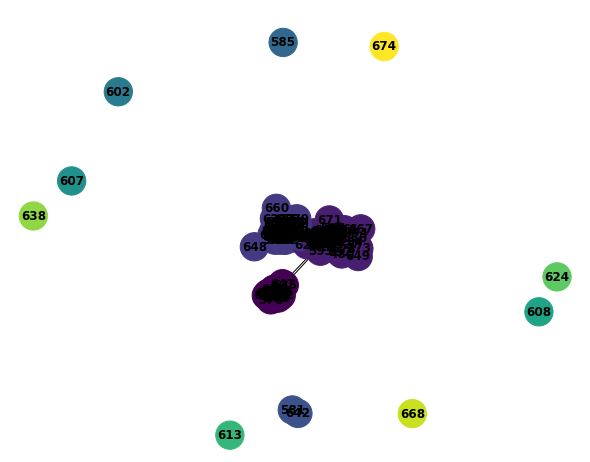

LPA


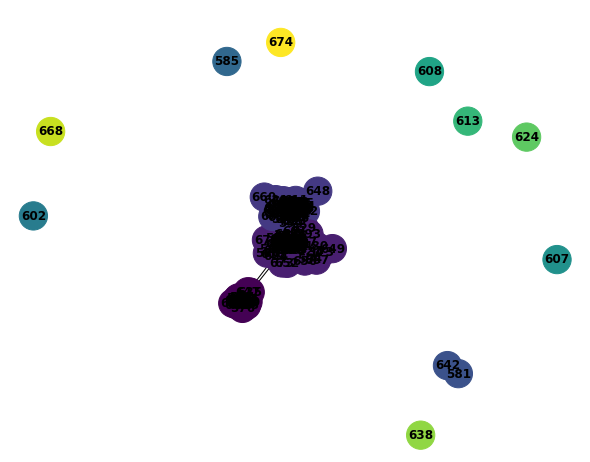

Ego node: 686


/Users/mkrtichhovsepyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_optics.py:807: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


KMeans


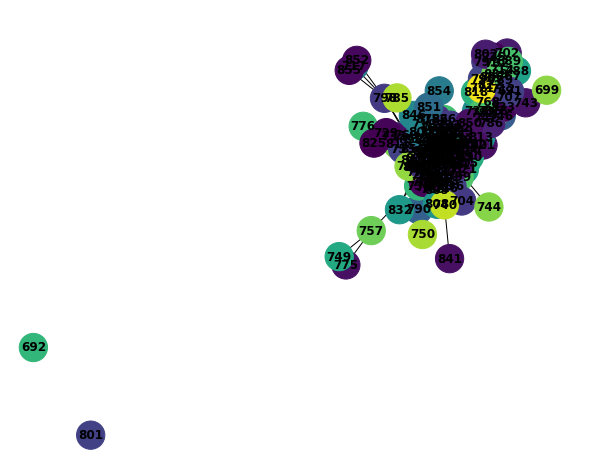

DBSCAN


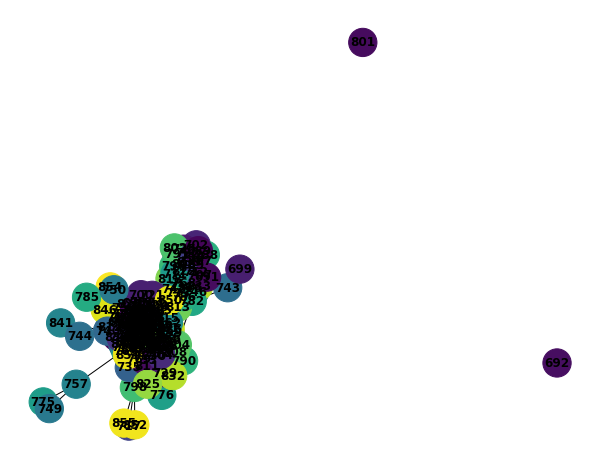

MeanShift


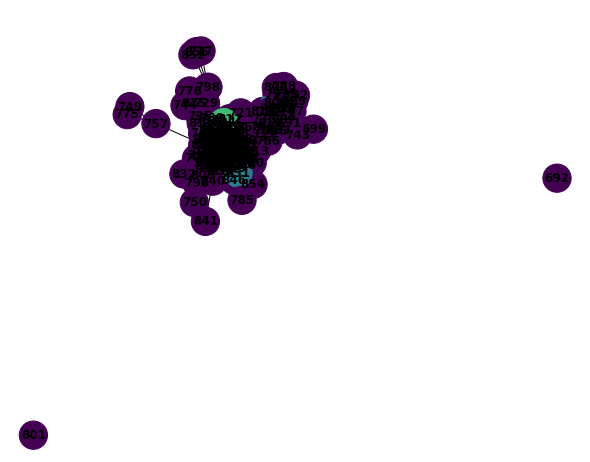

GMM


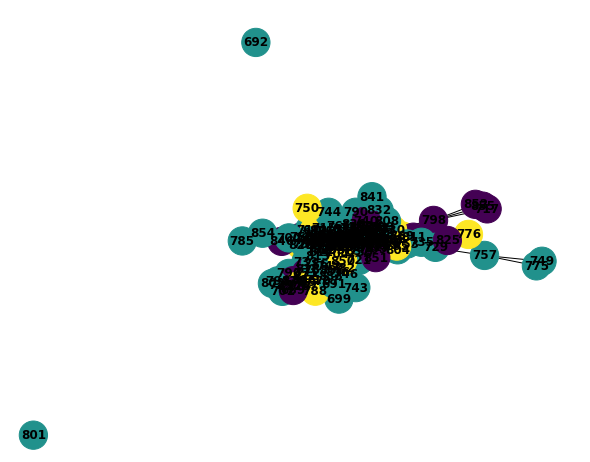

Hier


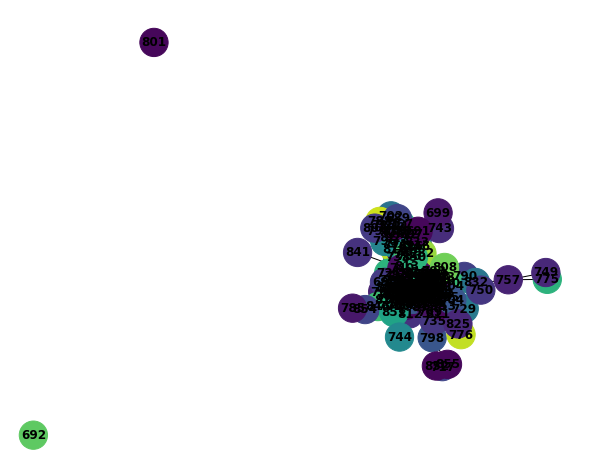

OPTICS


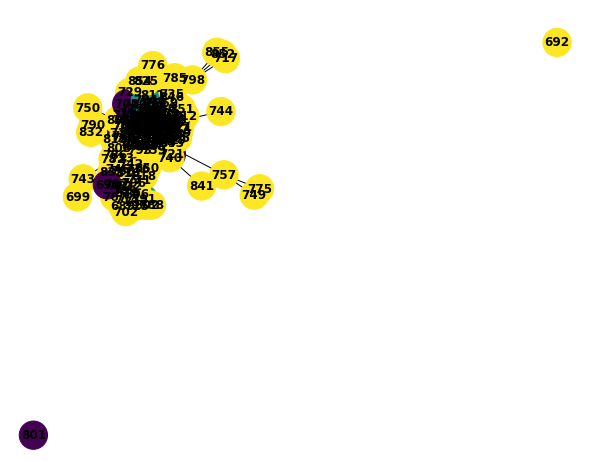

Greedy


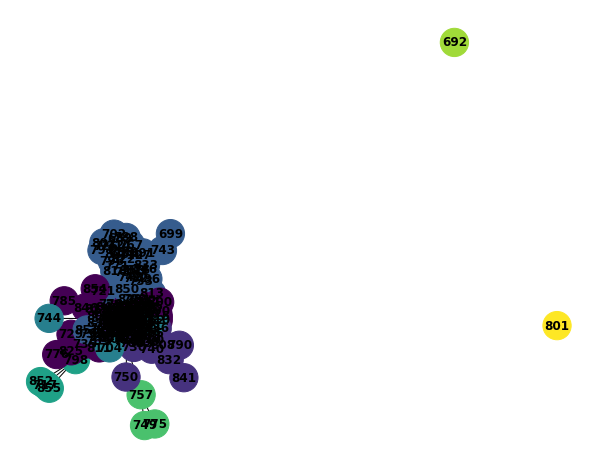

Newman


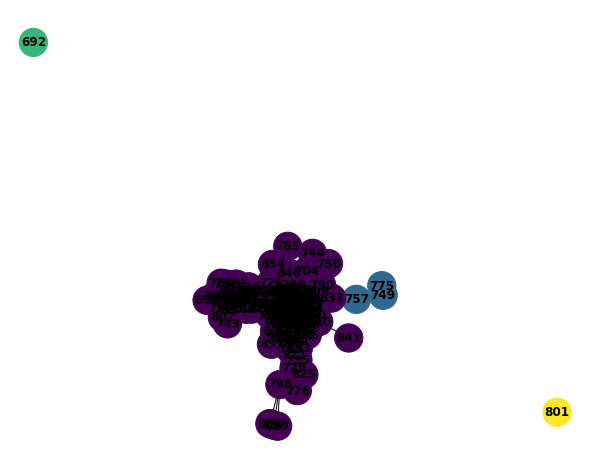

Partition


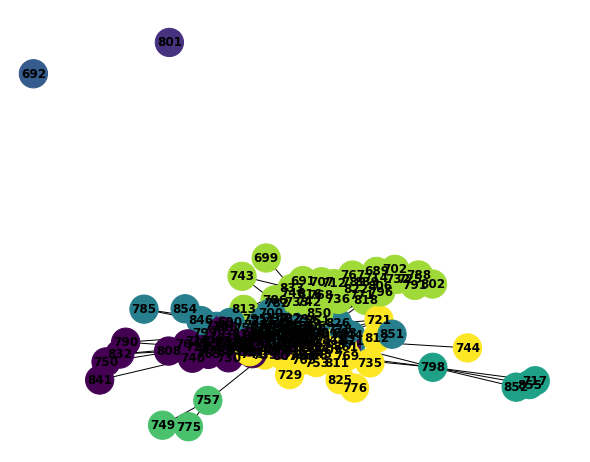

Label Propogation


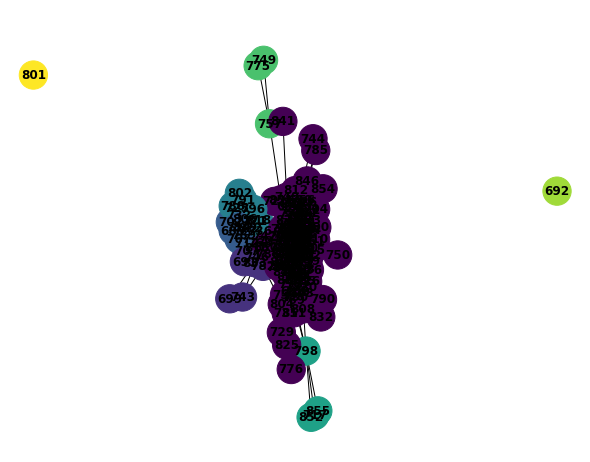

LPA


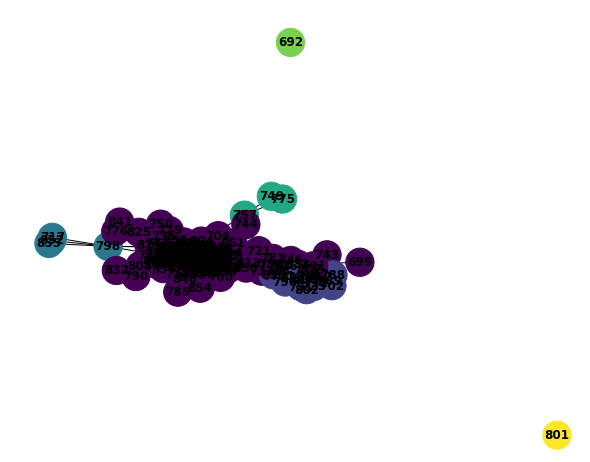

Ego node: 698
KMeans


/var/folders/st/q8k3m57x71bbmhhvc1l_t3vh0000gn/T/ipykernel_24015/1524690335.py:273: ConvergenceWarning: Number of distinct clusters (49) found smaller than n_clusters (60). Possibly due to duplicate points in X.
  kmeans.fit(data)
/Users/mkrtichhovsepyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_optics.py:807: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


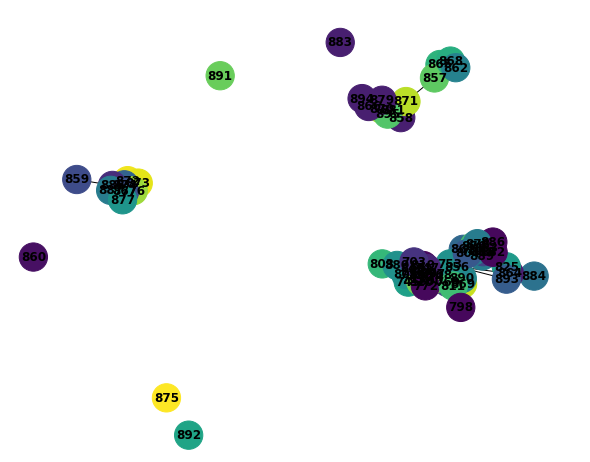

DBSCAN


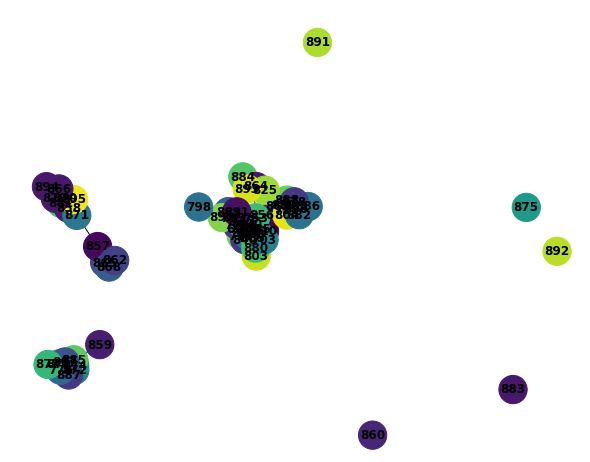

MeanShift


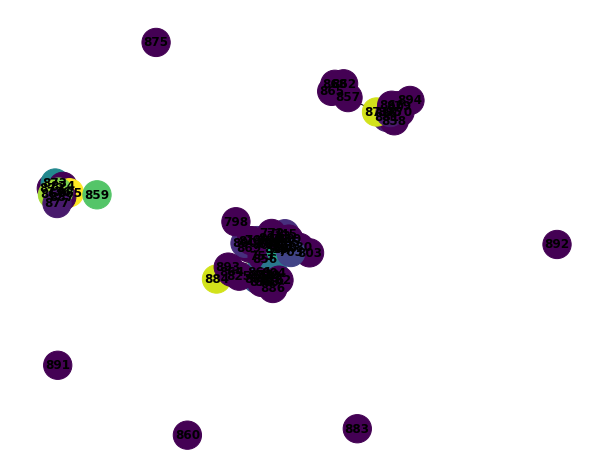

GMM


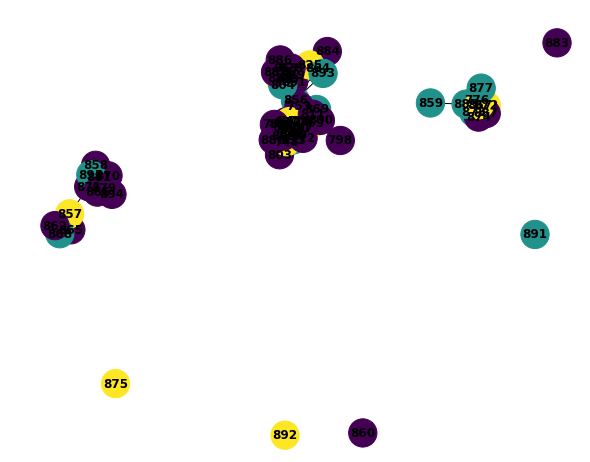

Hier


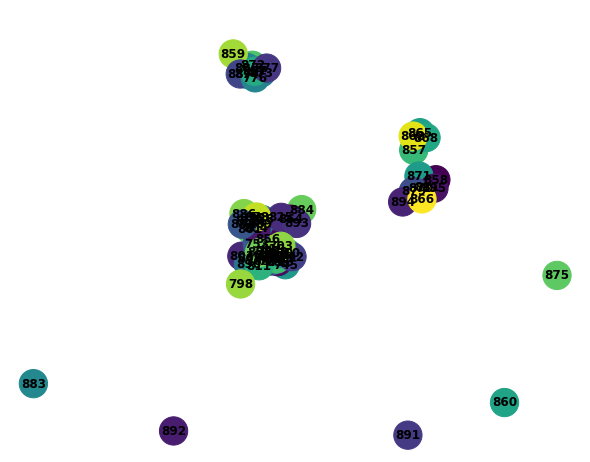

OPTICS


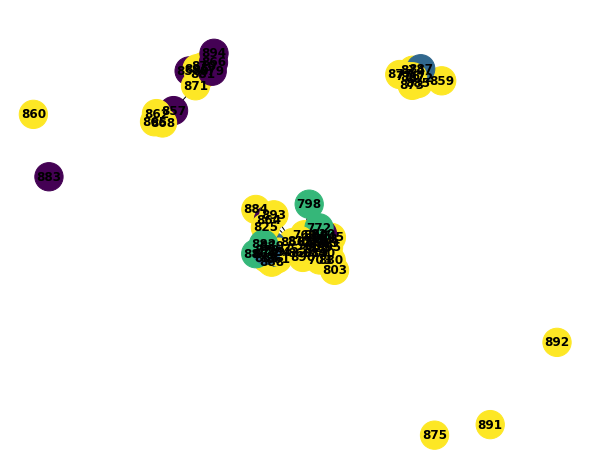

Greedy


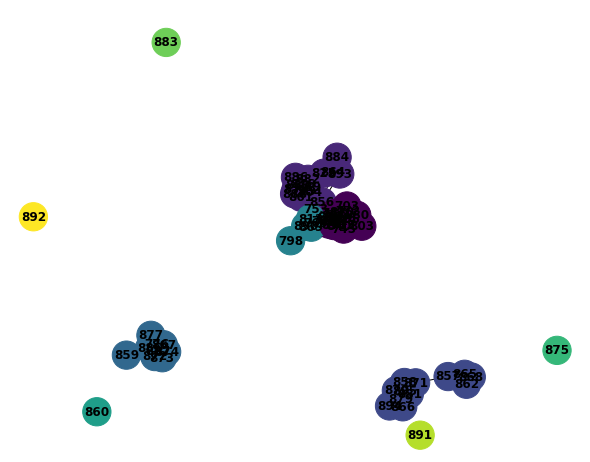

Newman


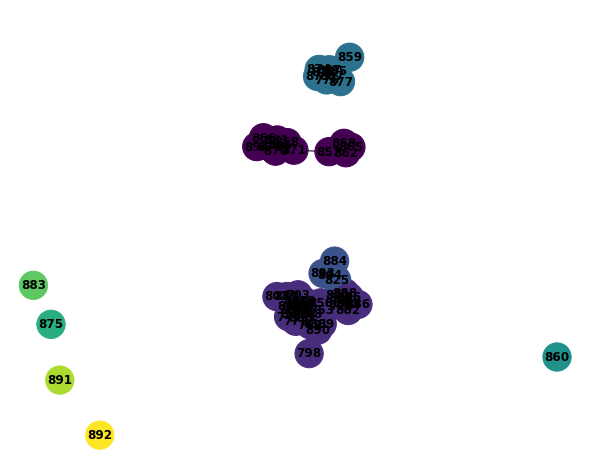

Partition


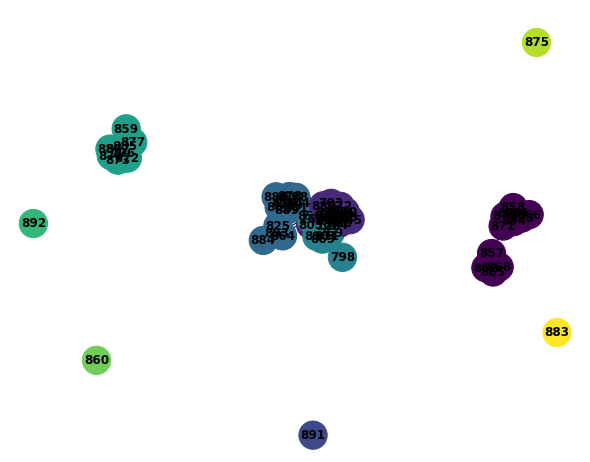

Label Propogation


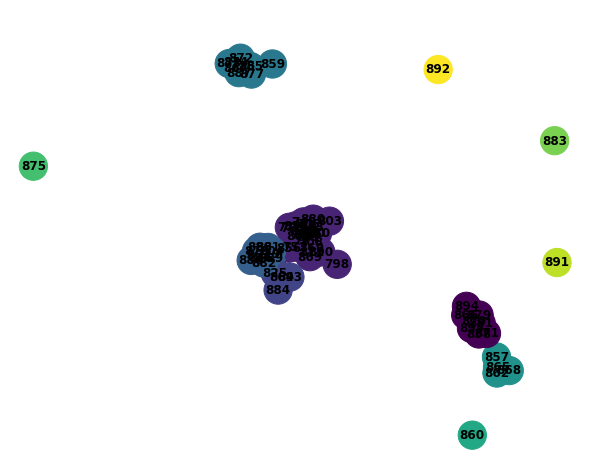

LPA


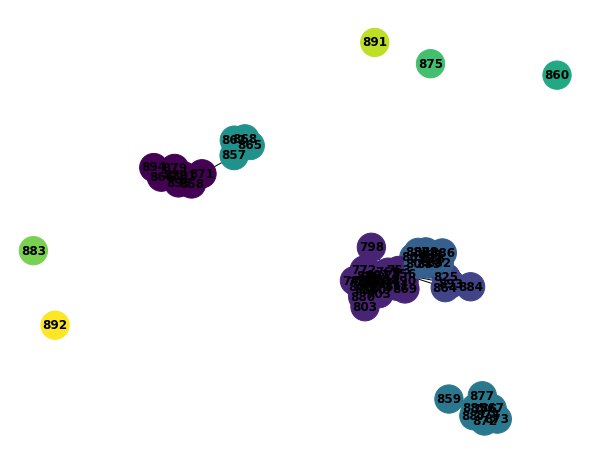

Ego node: 1684


/Users/mkrtichhovsepyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_optics.py:807: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


KMeans


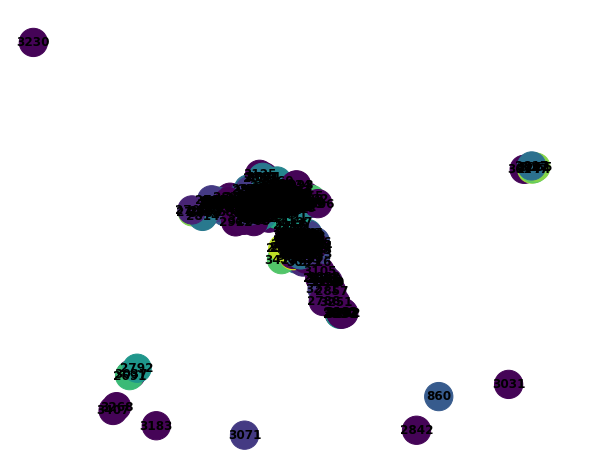

DBSCAN


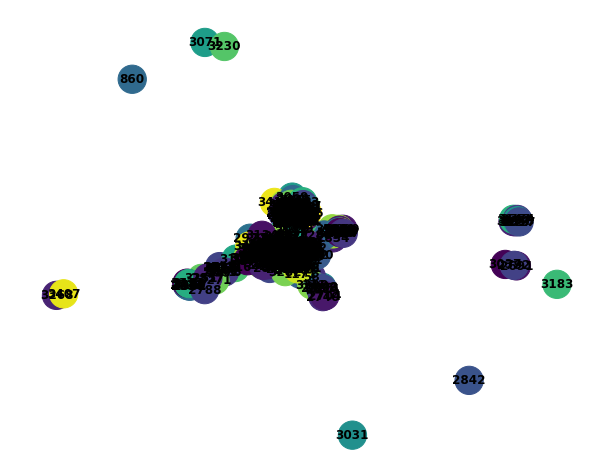

MeanShift


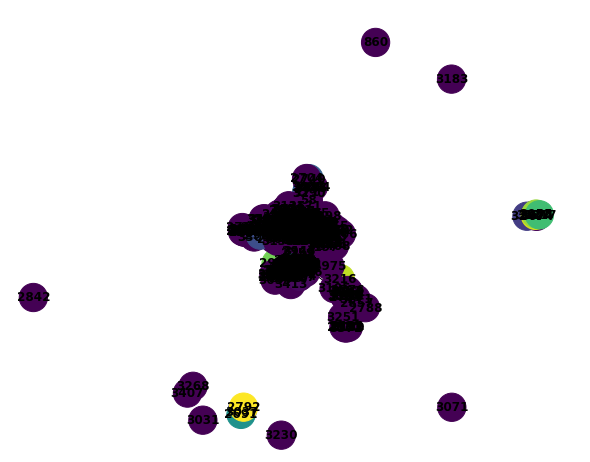

GMM


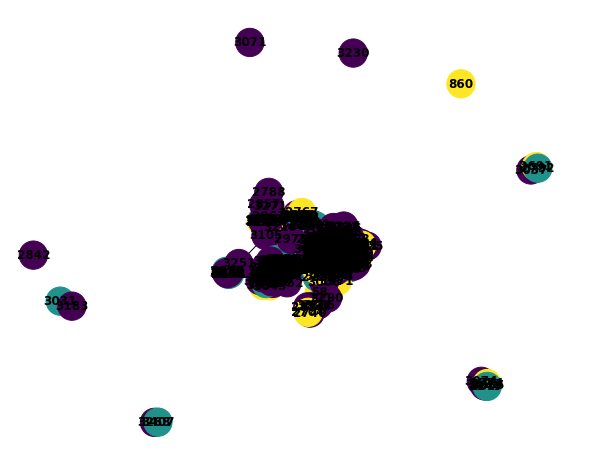

Hier


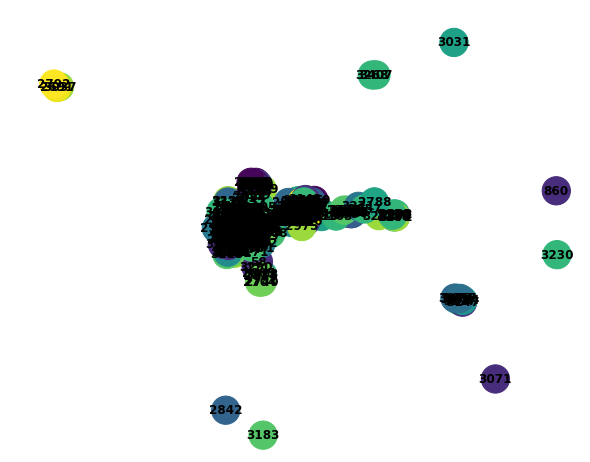

OPTICS


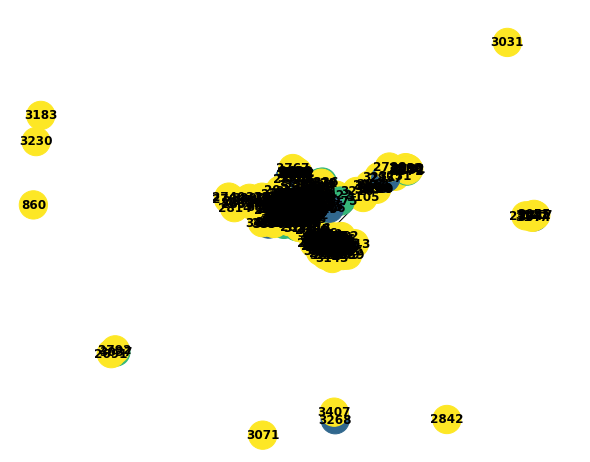

Greedy


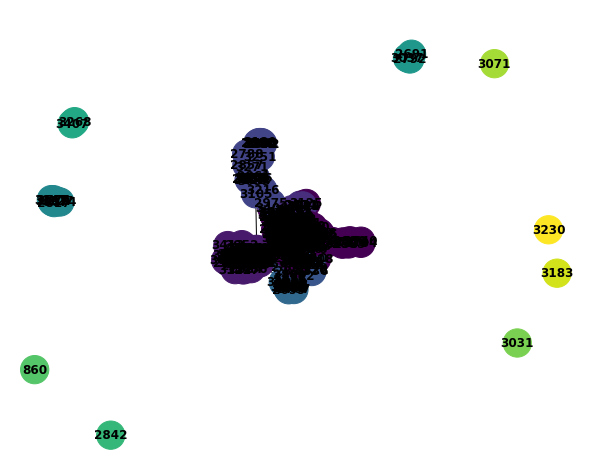

Newman


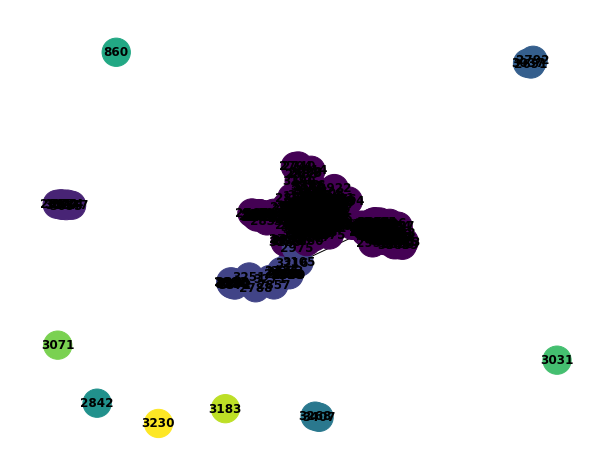

Partition


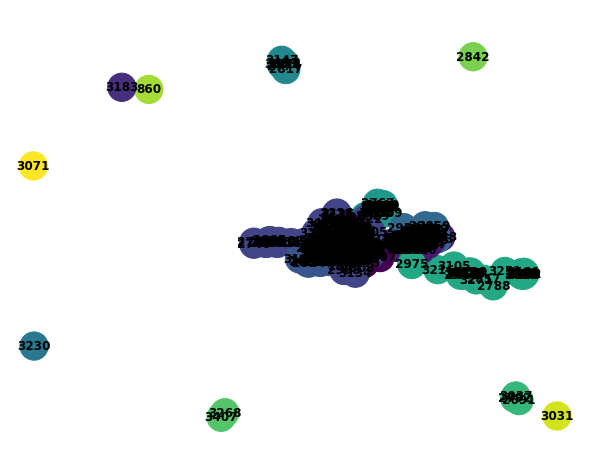

Label Propogation


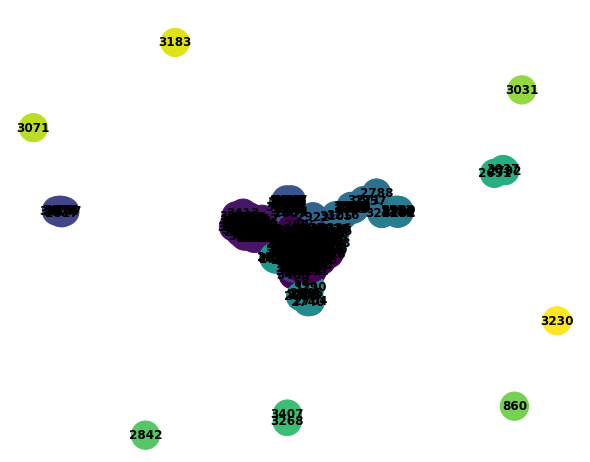

LPA


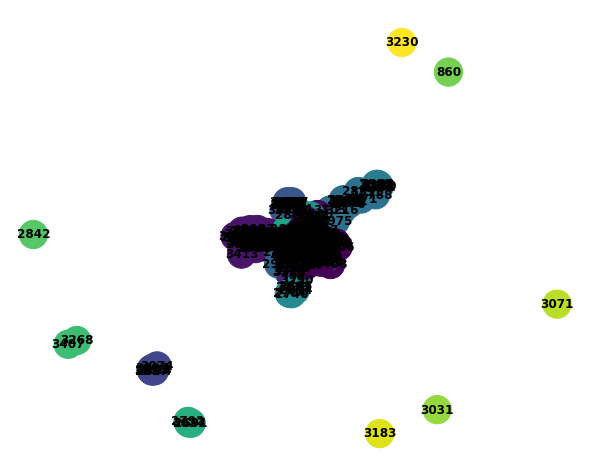

Ego node: 1912


/Users/mkrtichhovsepyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_optics.py:807: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


KMeans


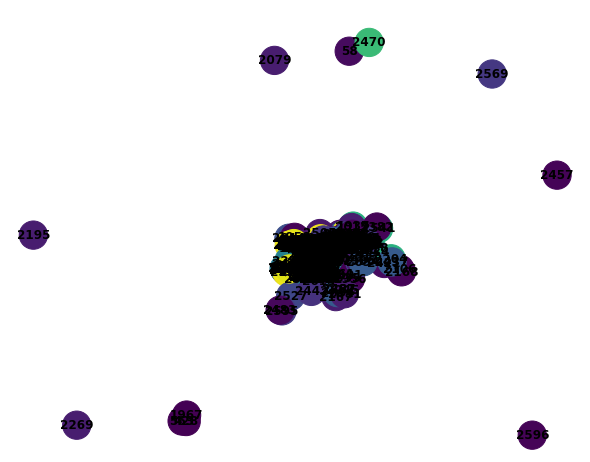

DBSCAN


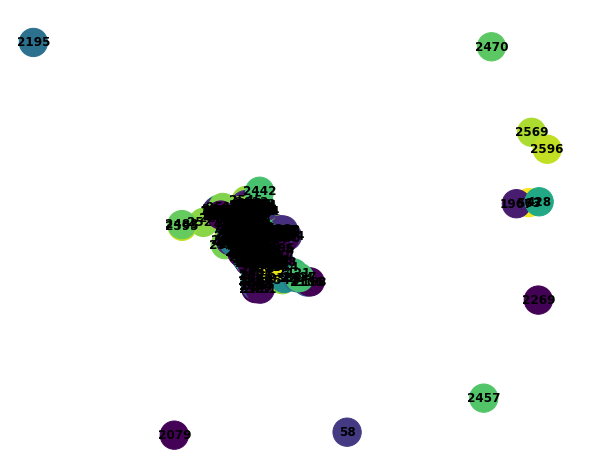

MeanShift


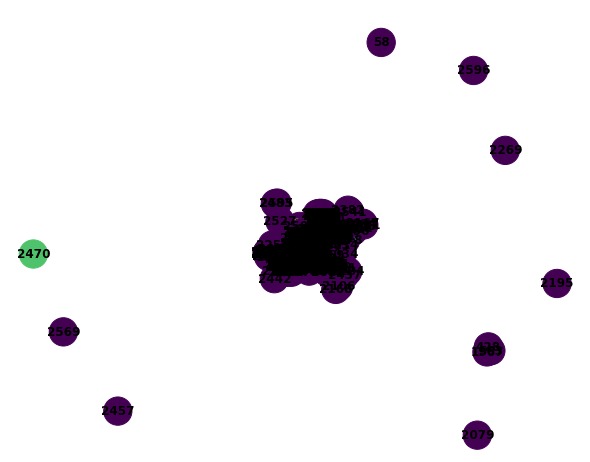

GMM


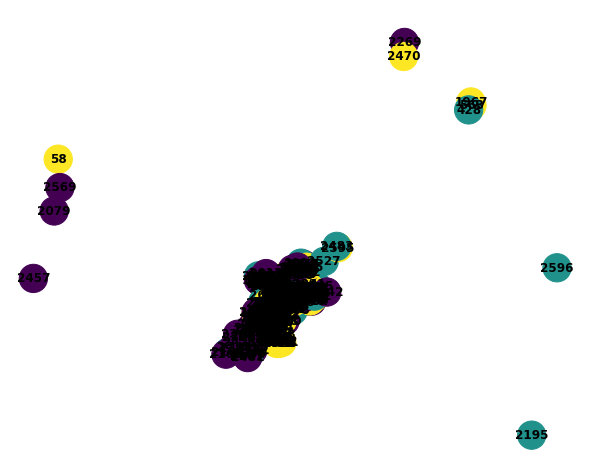

Hier


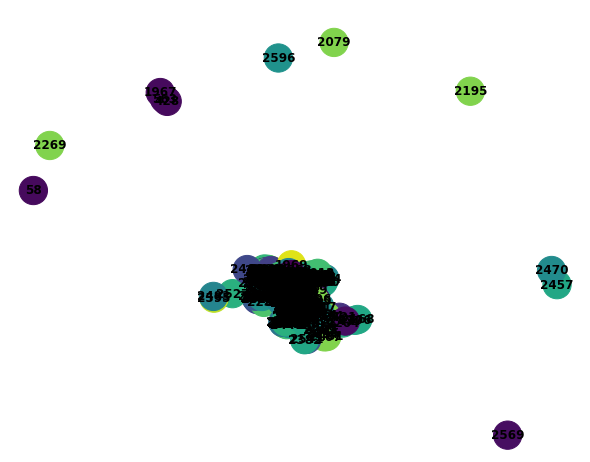

OPTICS


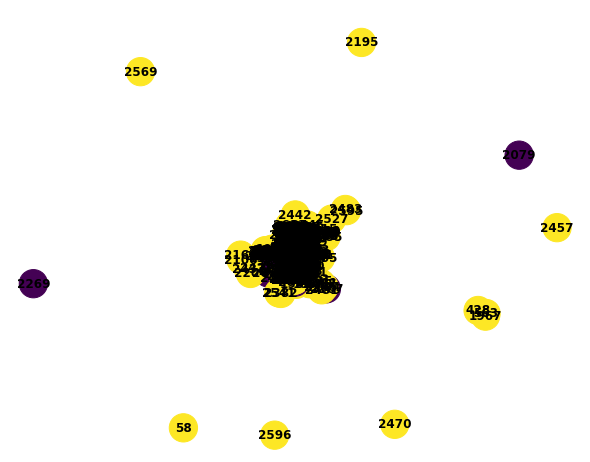

Greedy


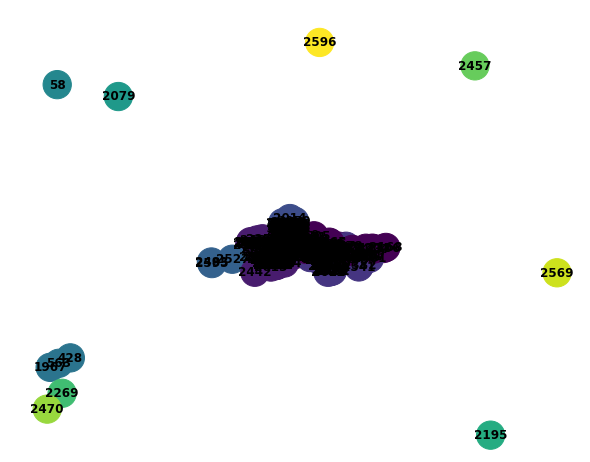

Newman


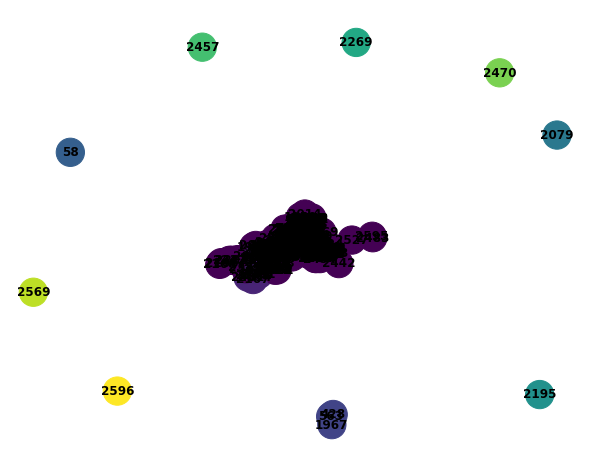

Partition


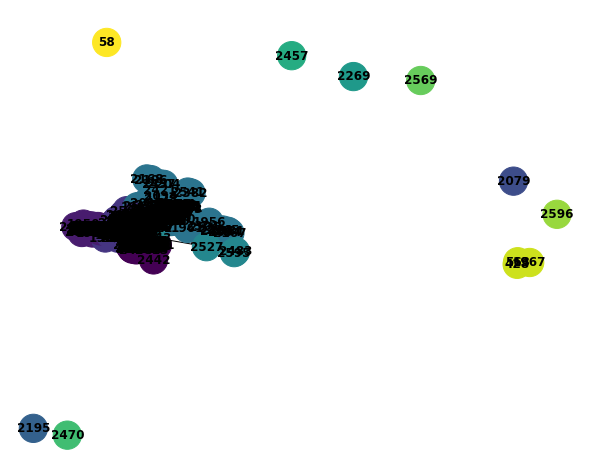

Label Propogation


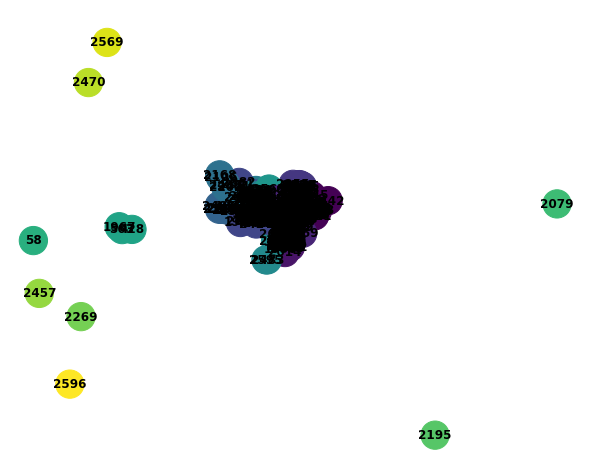

LPA


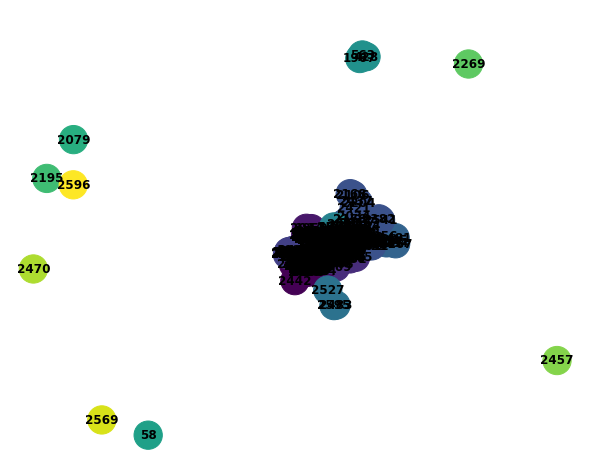

Ego node: 3437


/Users/mkrtichhovsepyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_optics.py:807: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


KMeans


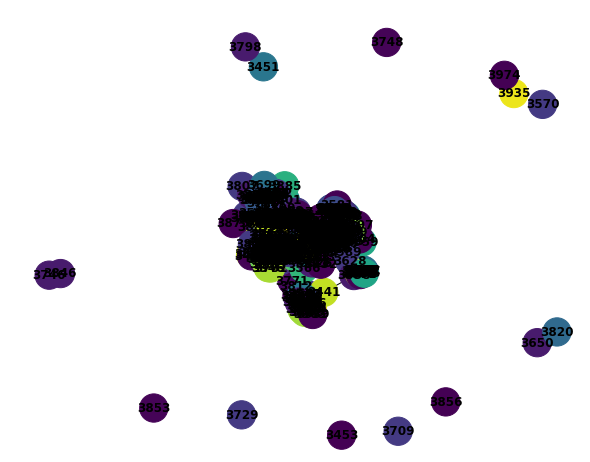

DBSCAN


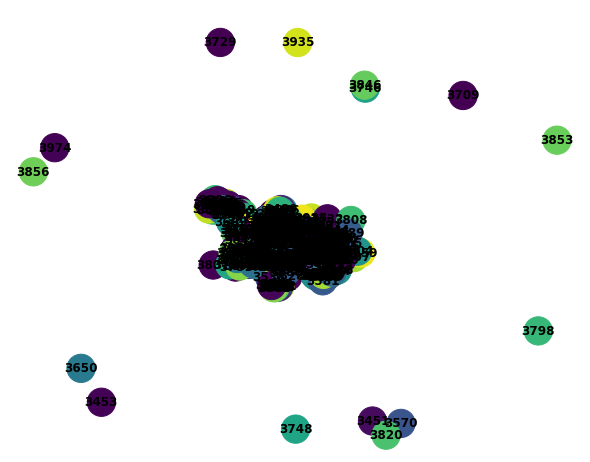

MeanShift


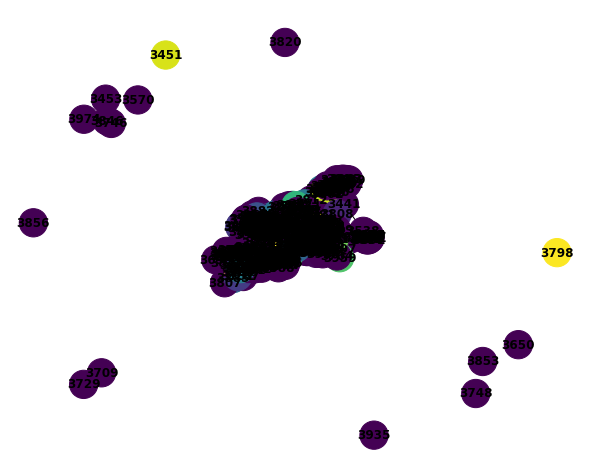

GMM


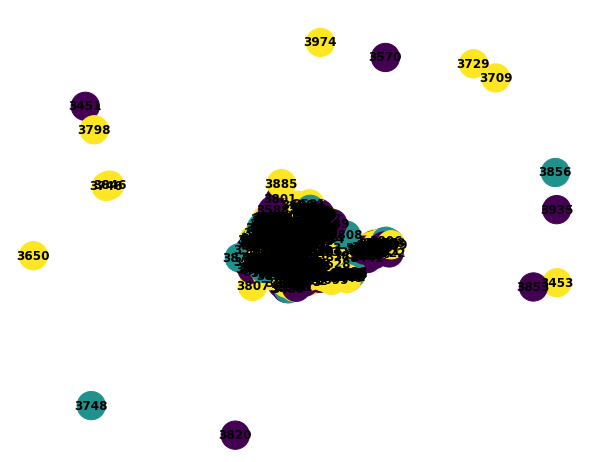

Hier


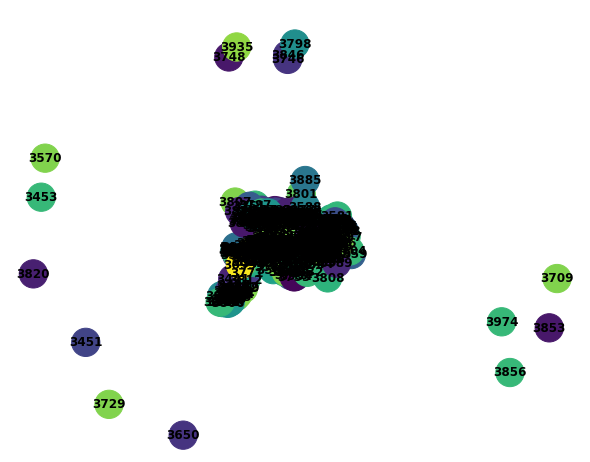

OPTICS


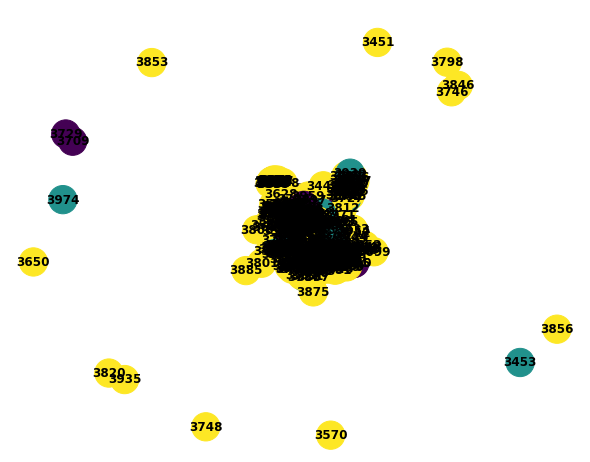

Greedy


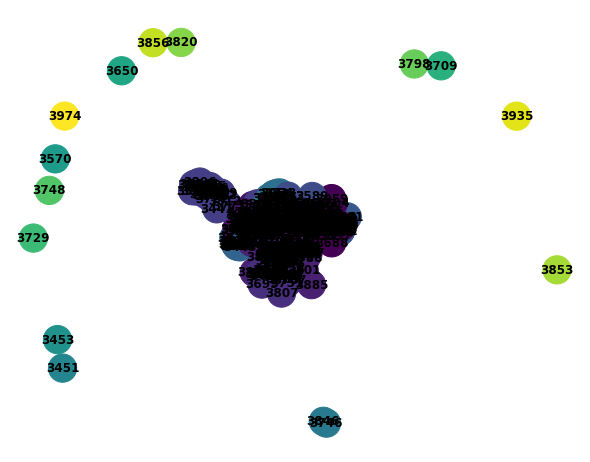

Newman


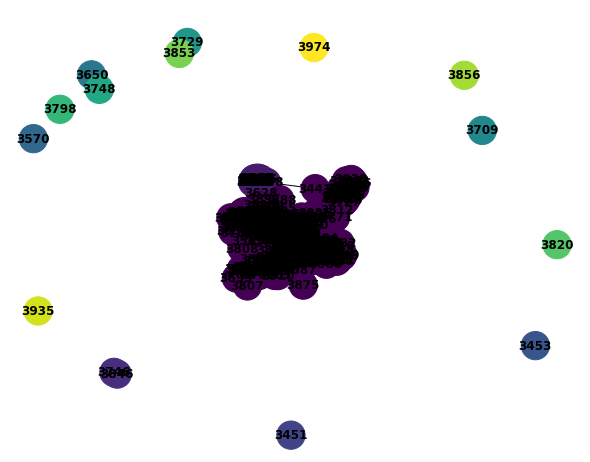

Partition


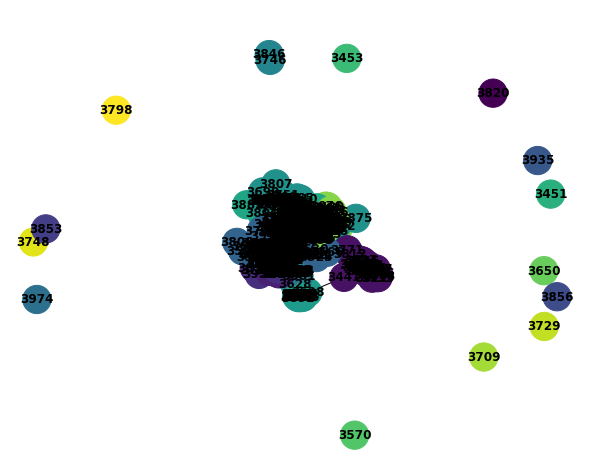

Label Propogation


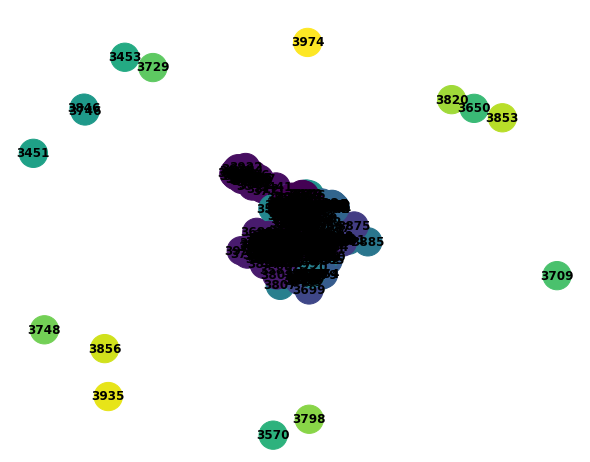

LPA


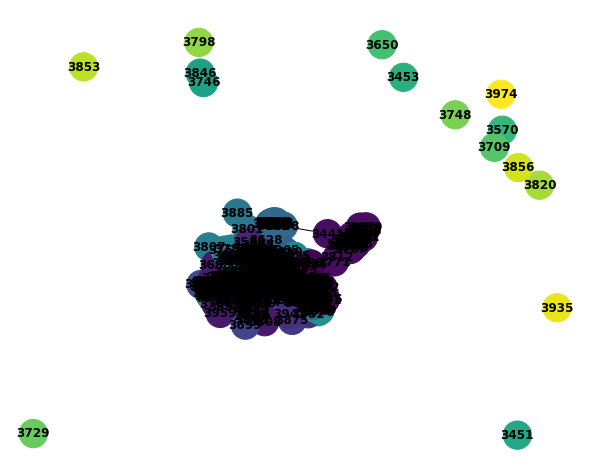

Ego node: 3980


/var/folders/st/q8k3m57x71bbmhhvc1l_t3vh0000gn/T/ipykernel_24015/1524690335.py:273: ConvergenceWarning: Number of distinct clusters (45) found smaller than n_clusters (58). Possibly due to duplicate points in X.
  kmeans.fit(data)
/Users/mkrtichhovsepyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_optics.py:807: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


KMeans


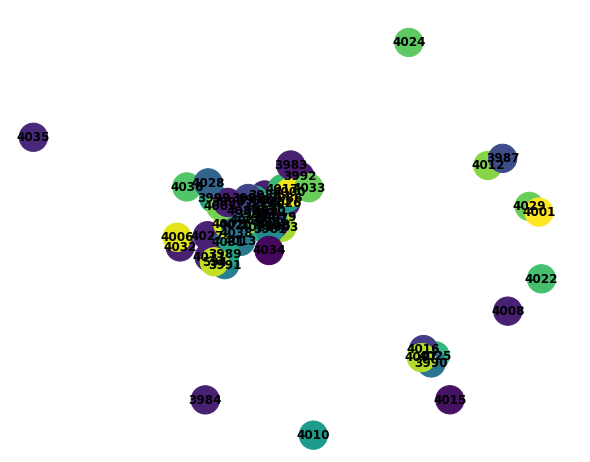

DBSCAN


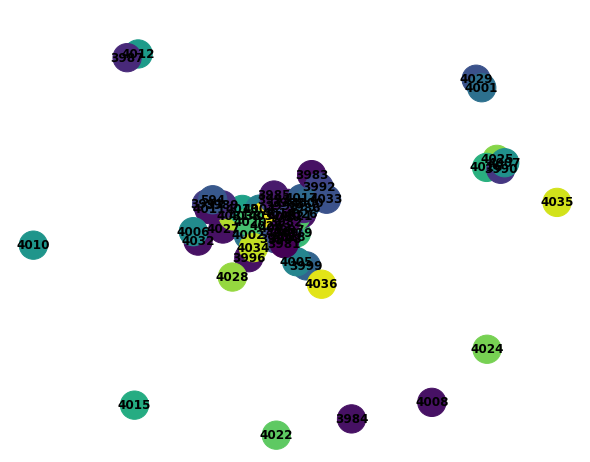

MeanShift


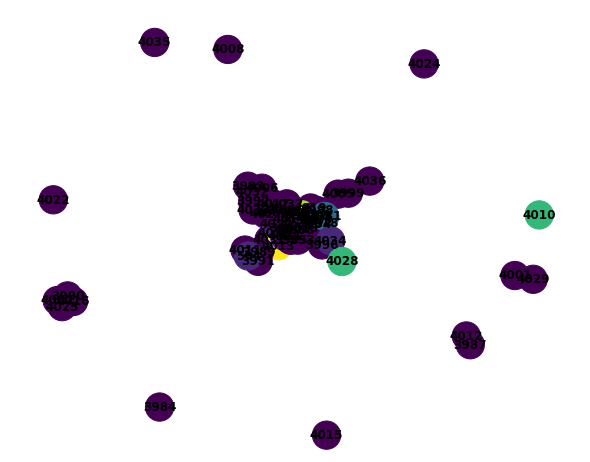

GMM


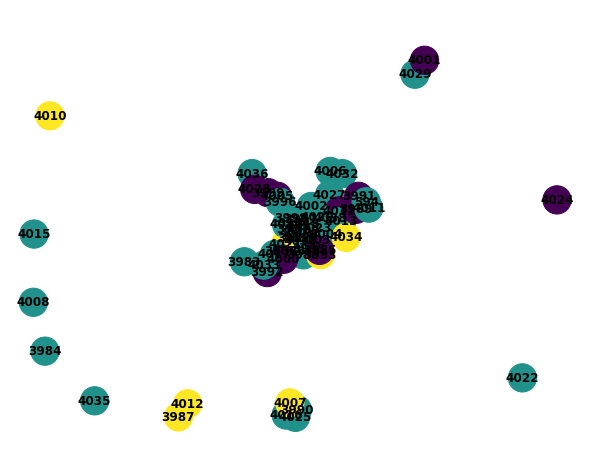

Hier


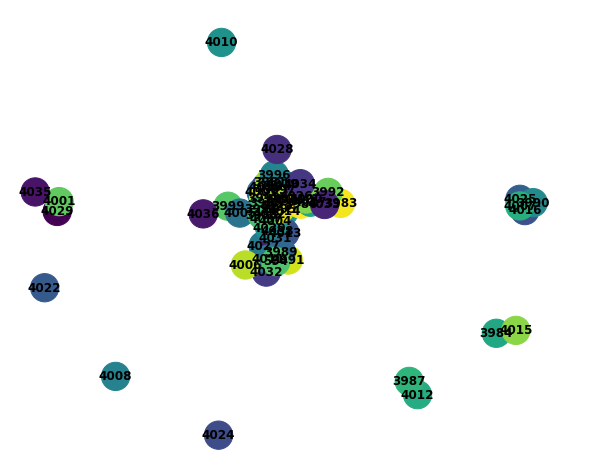

OPTICS


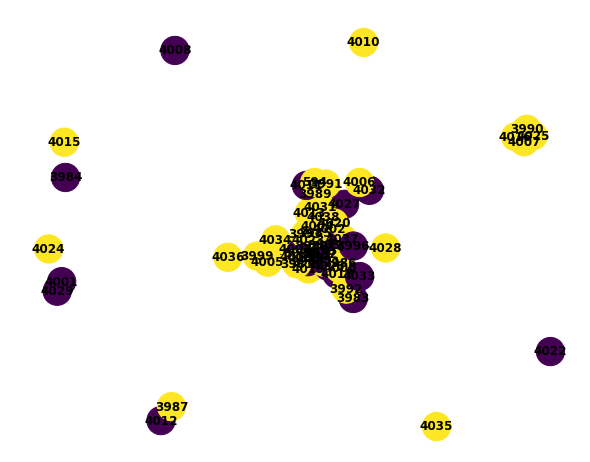

Greedy


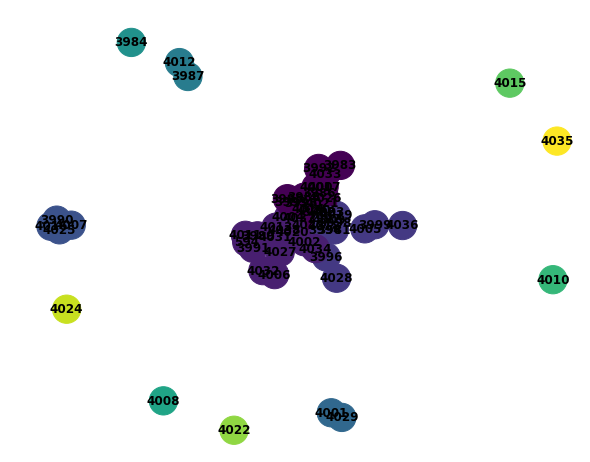

Newman


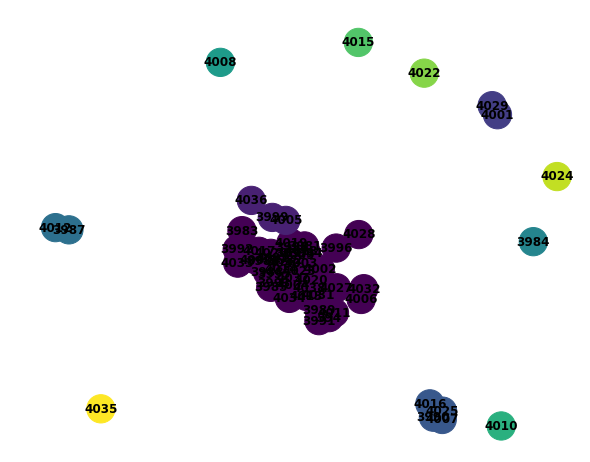

Partition


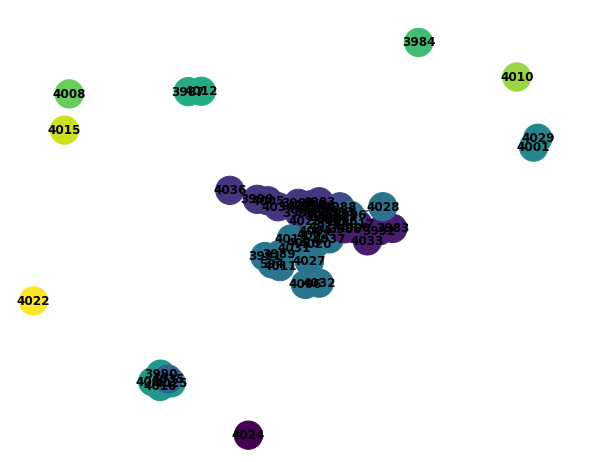

Label Propogation


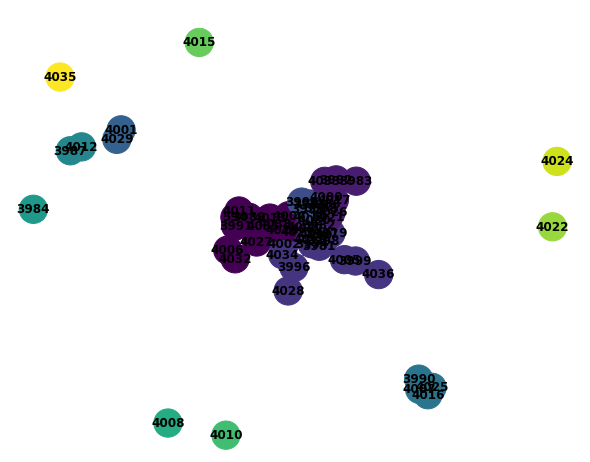

LPA


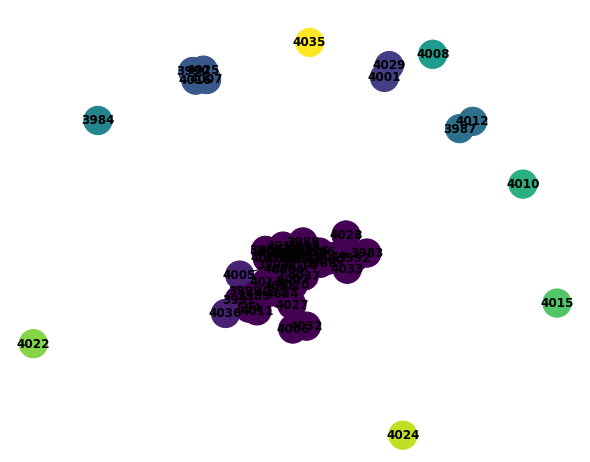

In [230]:
for ego in EGO_NODES:
    print("Ego node:", ego)

    # Get the data
    data, data_dict, index_dict = create_data("facebook/" + str(ego) + ".feat")
    test_labels = read_labels("facebook/" + str(ego) + ".circles")
    network_G = nx.read_edgelist("facebook/" + str(ego) + ".edges")

    # There can be a case when we have a node without any connections
    for i in index_dict:
        if i not in network_G.nodes:
            network_G.add_node(i)

    results = get_results(network_G, data, data_dict, index_dict, test_labels, ModelTypes.ONLY_FEEATURES, ego=ego, plot=True)
    results.to_csv("results/ONLY_FEATURES." + str(ego) + ".csv")

    results = get_results(network_G, data, data_dict, index_dict, test_labels, ModelTypes.ONLY_EDGES, ego=ego, plot=True)
    
    # Save the results to csv
    results.to_csv("results/ONLY_EDGES." + str(ego) + ".csv")


    

## Lets create a model that will work with graph architecture and features